# AWS Lambda

## Serverless Computing

- Build and deploy, Monitor and maintain

- No infrastructure managed

- PaaS 

## AWS Lambda

- Fully managed

- Event-driven invocation
- Offers subsecond metering
- Limits function runtime to a maximum of **15** minutes
- Multiple programming languages

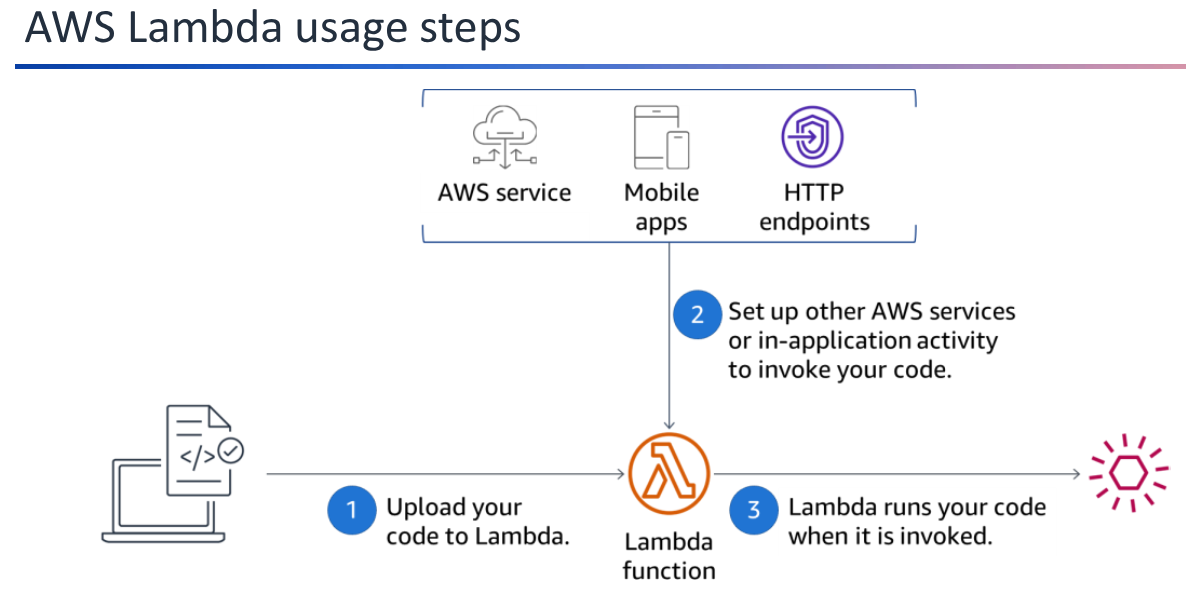

## Develop and Deploy a Lambda function

1. define a **handler** class, which can specify where Lambda can begin running your code. For example, [Lambda Function Handlet in Python](https://docs.aws.amazon.com/lambda/latest/dg/python-handler.html)

2. Create Lambda function

3. Configure access to resources by using AWS Identity and Access Management (IAM) roles and permissions. 

4. Upload, test, verify your code, and review your logs.

6. Monitor using Amazon CloudWatch. Examples might include number of requests, latency, and number of requests with the given error.

Below is a sample Lambda code

In [ ]:
import json
import os
import logging
import boto3

# Initialize the S3 client outside of the handler
s3_client = boto3.client('s3')

# Initialize the logger
logger = logging.getLogger()
logger.setLevel("INFO")

#* Helper function to upload receipt to S3
def upload_receipt_to_s3(bucket_name, key, receipt_content):
    """Helper function to upload receipt to S3"""
    
    try:
        s3_client.put_object(
            Bucket=bucket_name,
            Key=key,
            Body=receipt_content
        )
    except Exception as e:
        logger.error(f"Failed to upload receipt to S3: {str(e)}")
        raise

#*  Lambda handler
def lambda_handler(event, context):
    """
    Main Lambda handler function
    Parameters:
        event: Dict containing the Lambda function event data
        context: Lambda runtime context
    Returns:
        Dict containing status message
    """
    try:
        # Parse the input event
        order_id = event['Order_id']
        amount = event['Amount']
        item = event['Item']
        
        # Access environment variables
        bucket_name = os.environ.get('RECEIPT_BUCKET')
        if not bucket_name:
            raise ValueError("Missing required environment variable RECEIPT_BUCKET")

        # Create the receipt content and key destination
        receipt_content = (
            f"OrderID: {order_id}\n"
            f"Amount: ${amount}\n"
            f"Item: {item}"
        )
        key = f"receipts/{order_id}.txt"

        # Upload the receipt to S3
        upload_receipt_to_s3(bucket_name, key, receipt_content)

        logger.info(f"Successfully processed order {order_id} and stored receipt in S3 bucket {bucket_name}")
        
        return {
            "statusCode": 200,
            "message": "Receipt processed successfully"
        }

    except Exception as e:
        logger.error(f"Error processing order: {str(e)}")
        raise

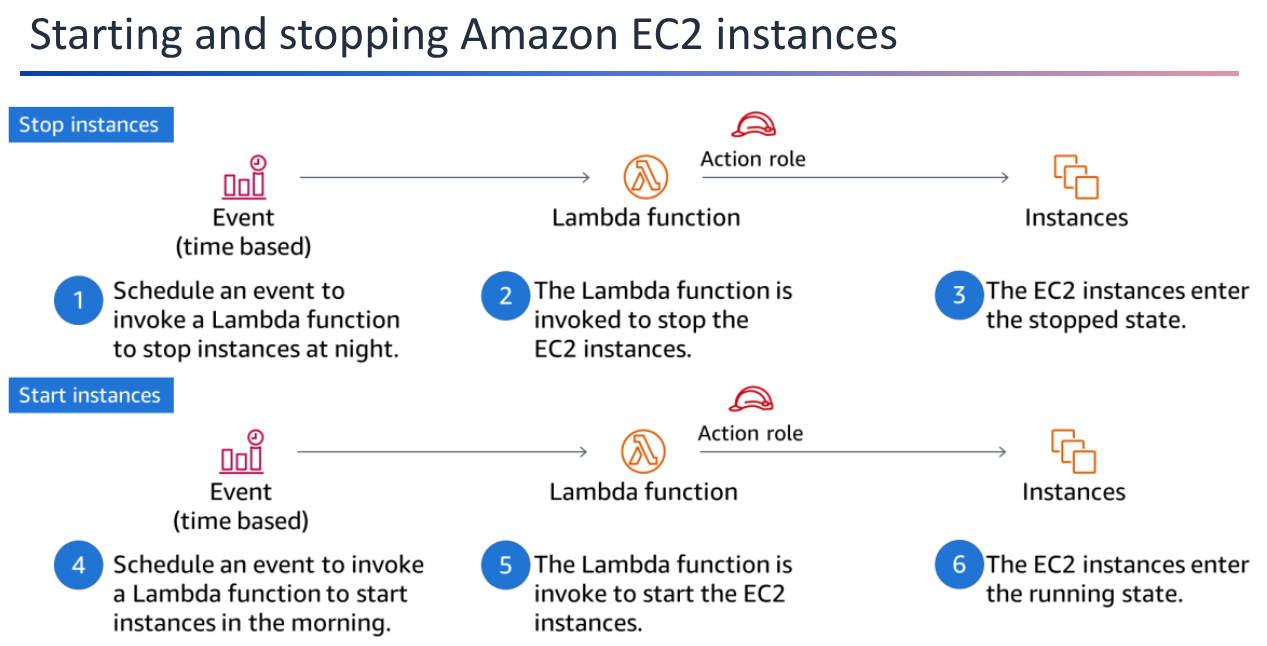

Automate this process with **Amazon EventBridge**. See [Stopping and Starting EC2 instances with Lambda and EventBridge](https://aws.amazon.com/premiumsupport/knowledge-center/start-stop-lambda-eventbridge/).

## [AWS Lambda layers](https://docs.aws.amazon.com/lambda/latest/dg/configuration-layers.html)

- Configure Lambda to use libraries not included in the deployment package

- Keep small deployment package
- Avoid errors in code for package dependencies
- Share libraries with other developers

## AWS Lambda Quotas

Quotas include the following:
- Compute and storage resources
- Function configuration, deployment, and execution
- Lambda API requests

A function that exceeds any of the limits will fail with an exceeded limits exception.

-  Lambda also sets quotas on concurrency and package size (250 MB as of this writing). 
    - If you are troubleshooting a Lambda deployment, keep these in mind.
- As of this writing, the maximum memory allocation for a single Lambda function is 10 GB

# Lab 178 - Working with AWS Lambda

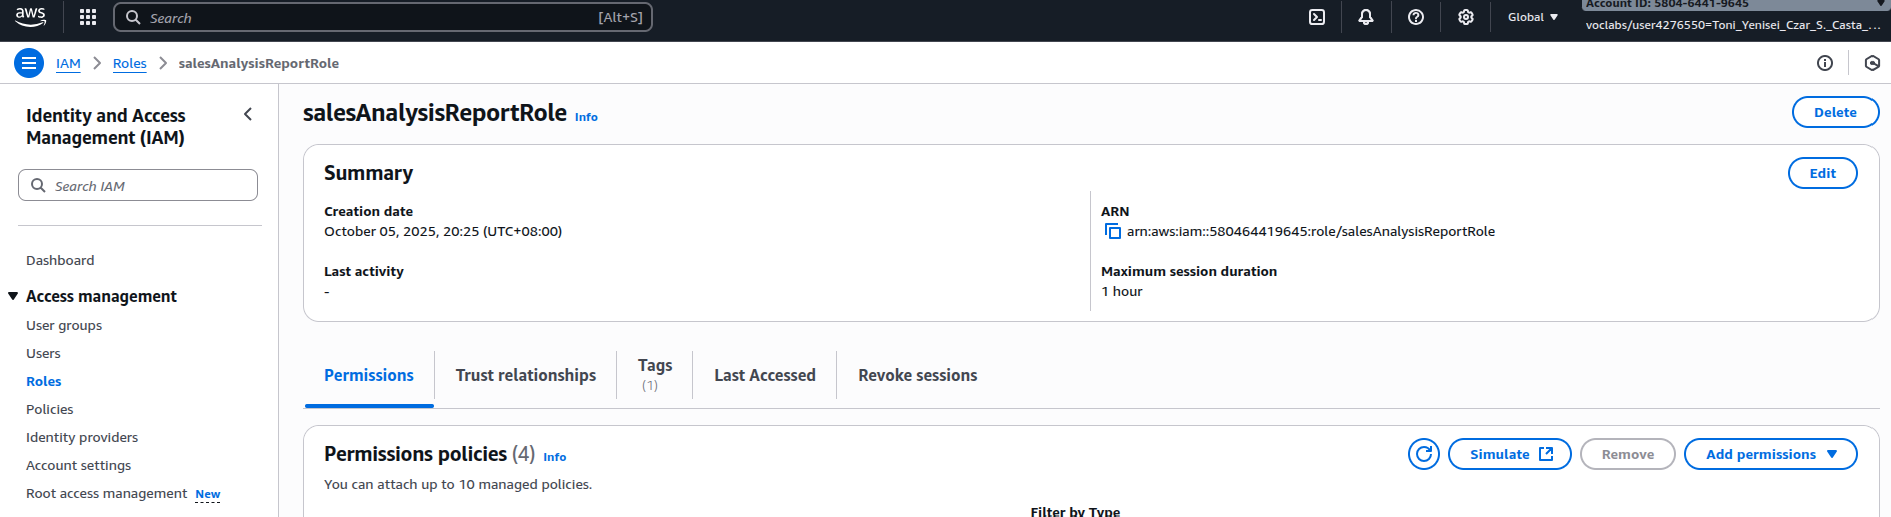

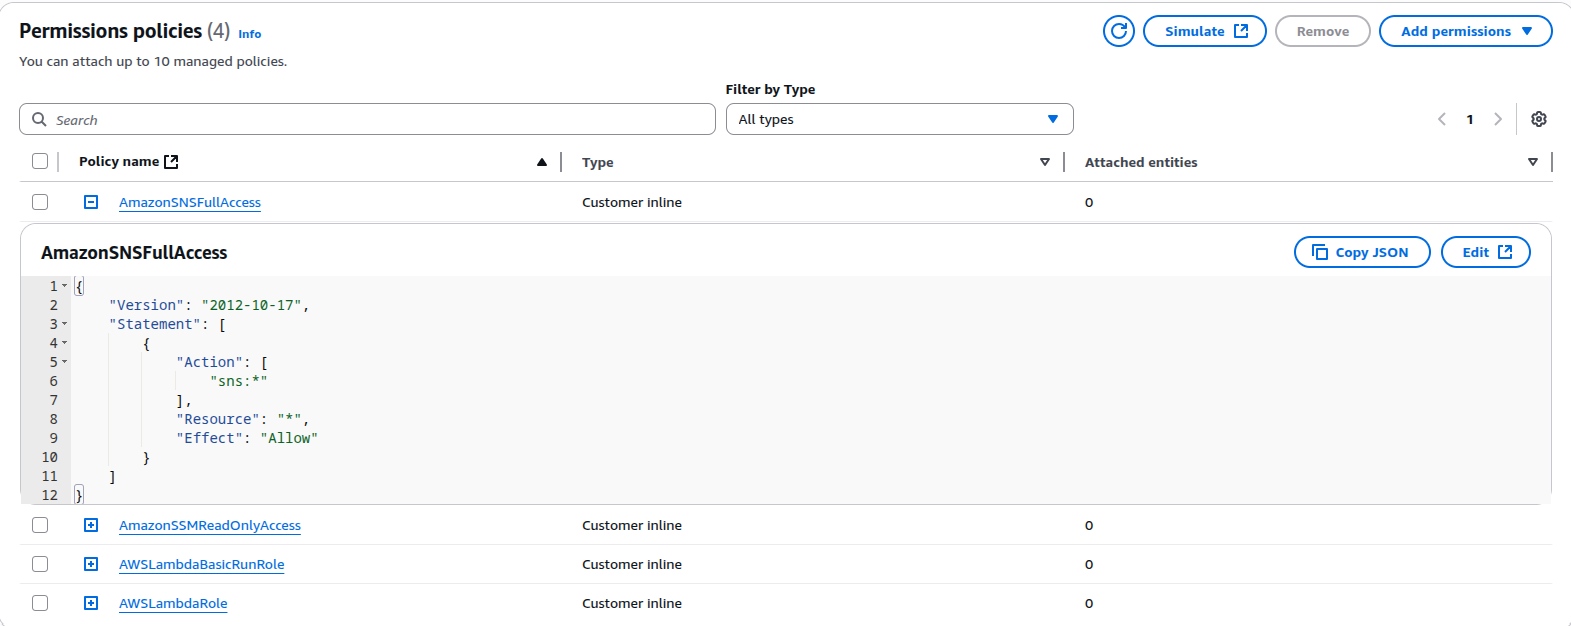

## Create a Lambda Layer

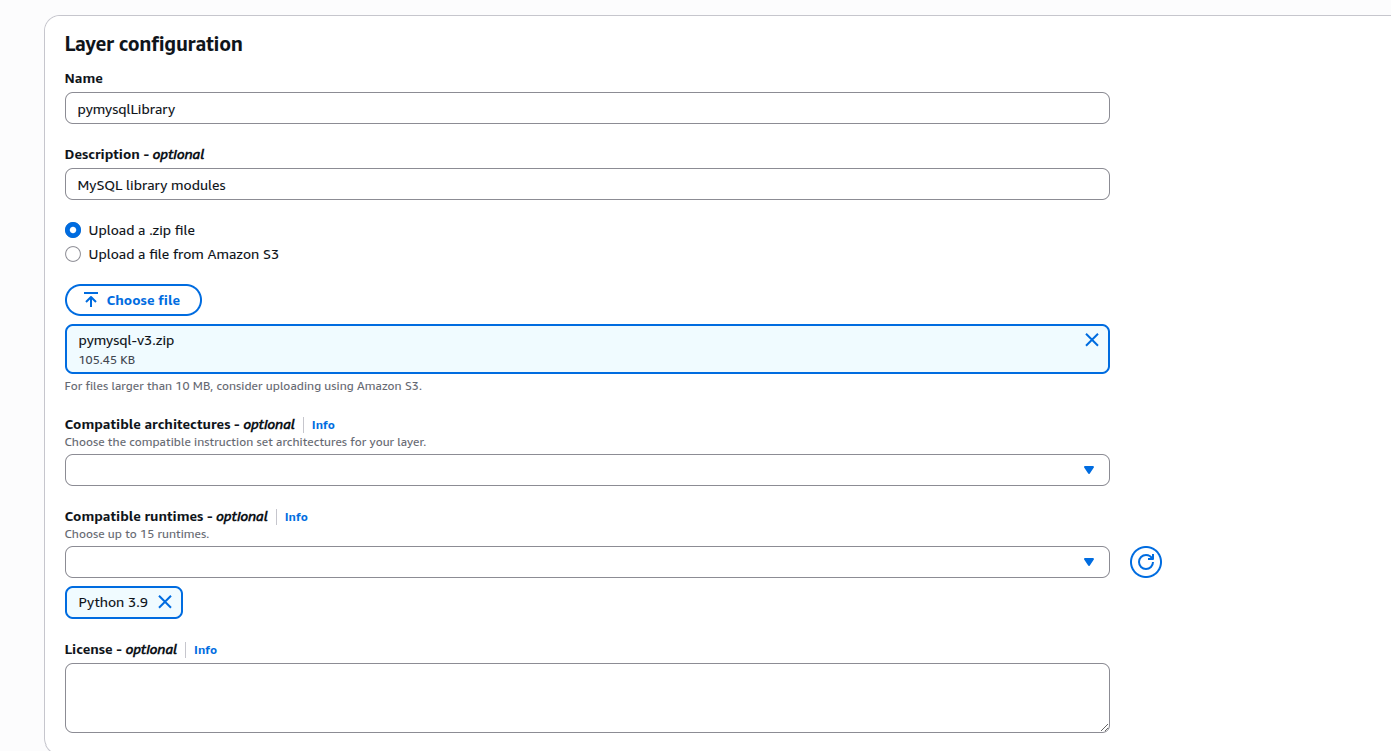

## Creating a Data Extracting Lambda Function

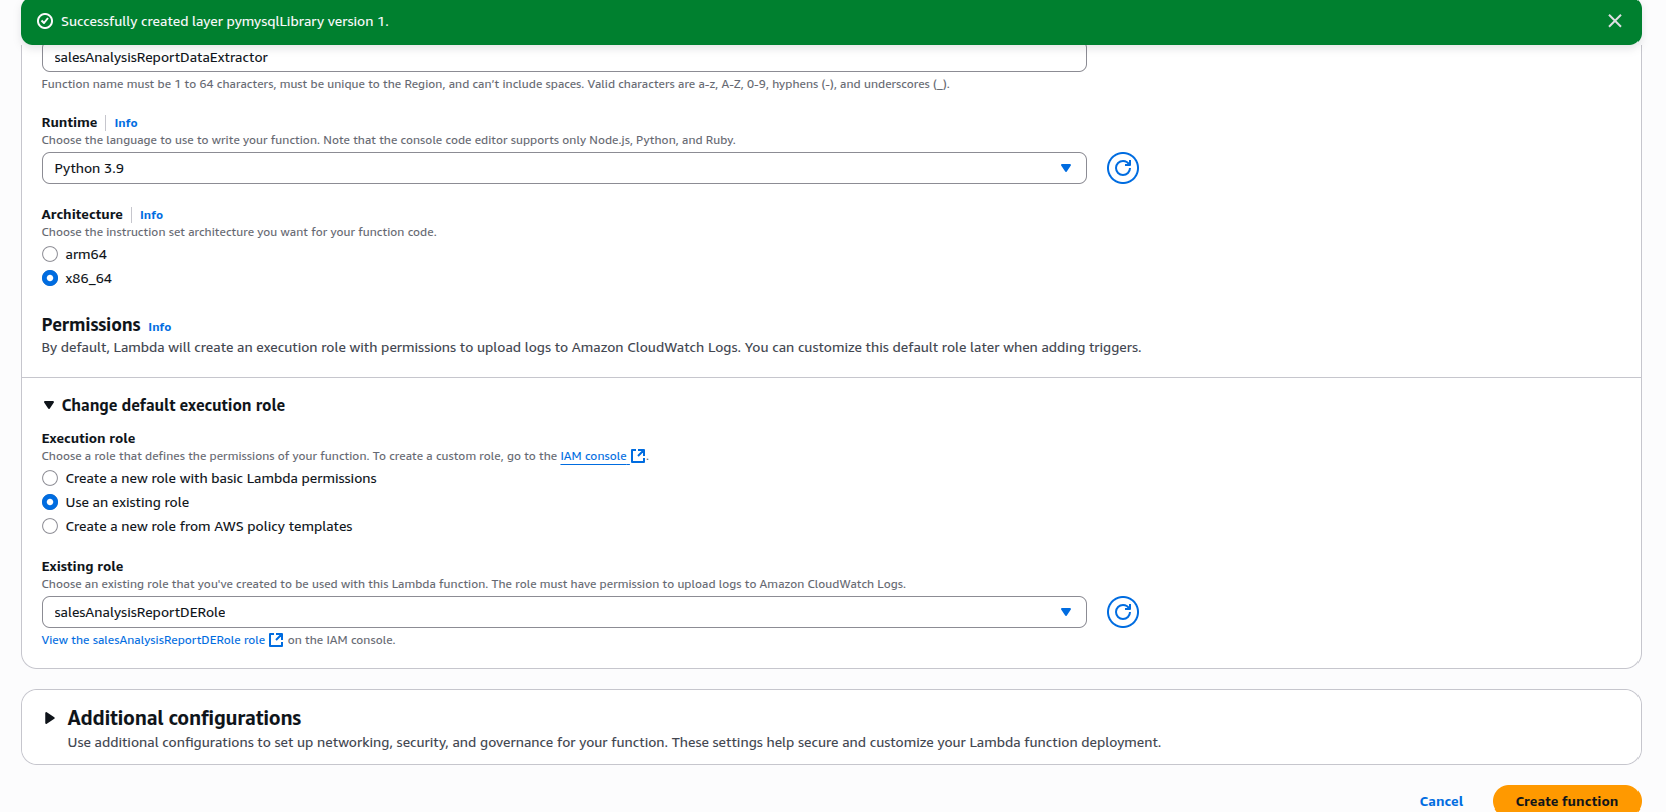

### Add Lambda Layer to Function

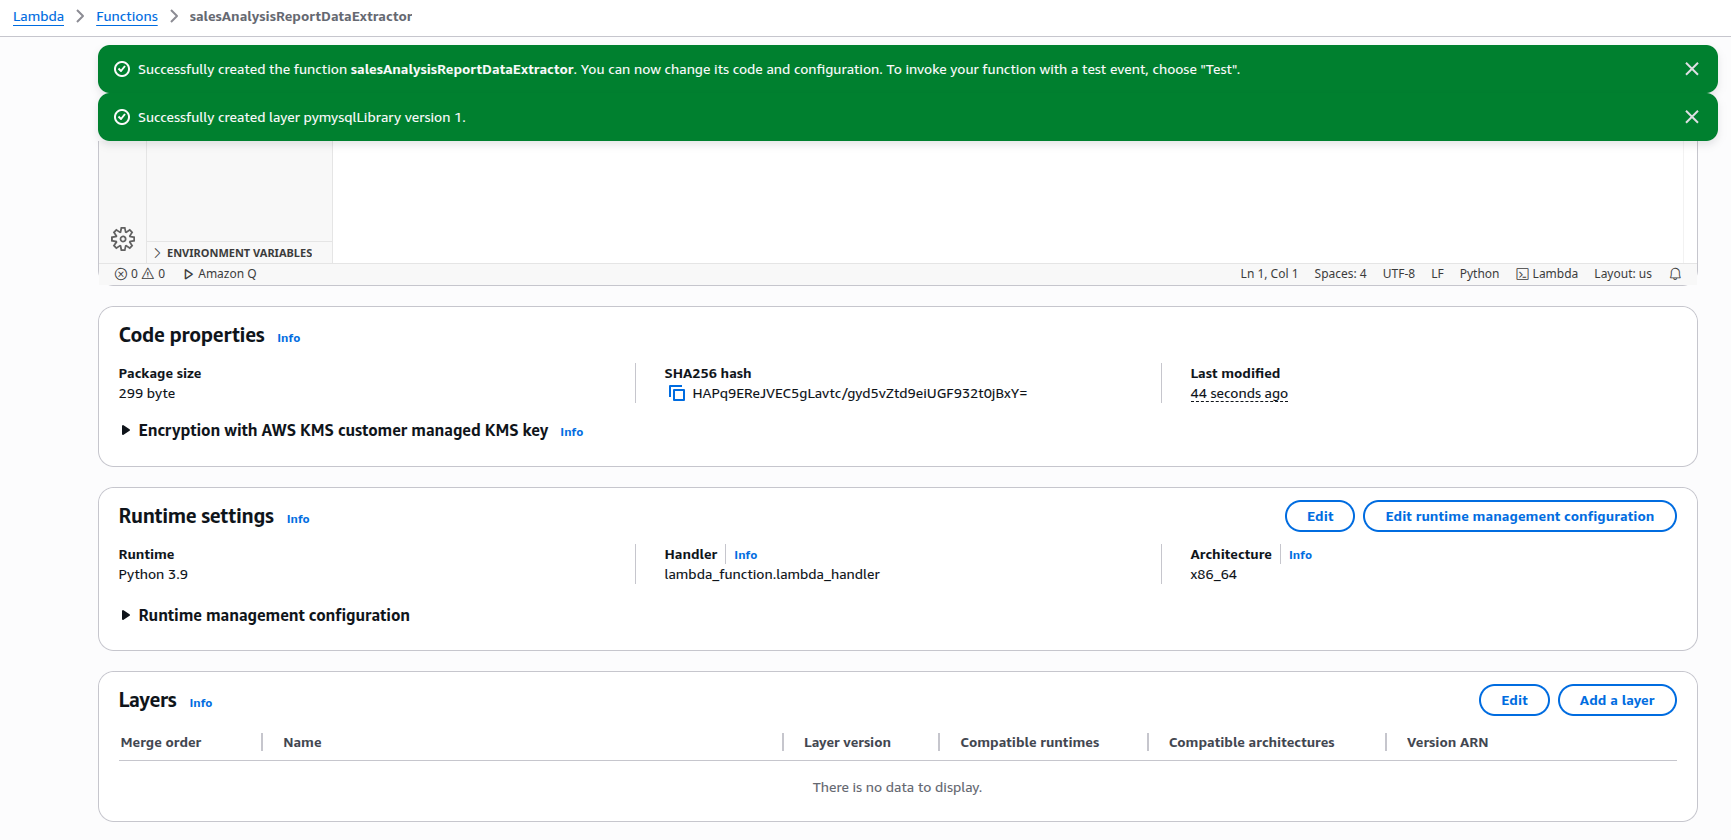

### Importing the code for the data extractor Lambda function

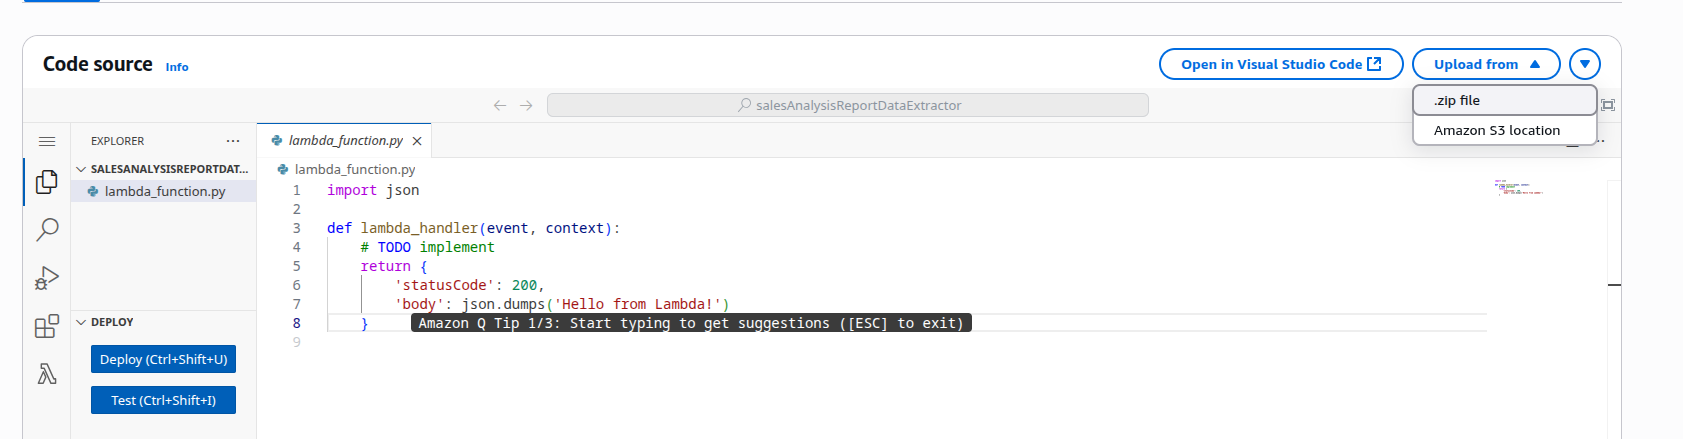

### Configuring Network Settings

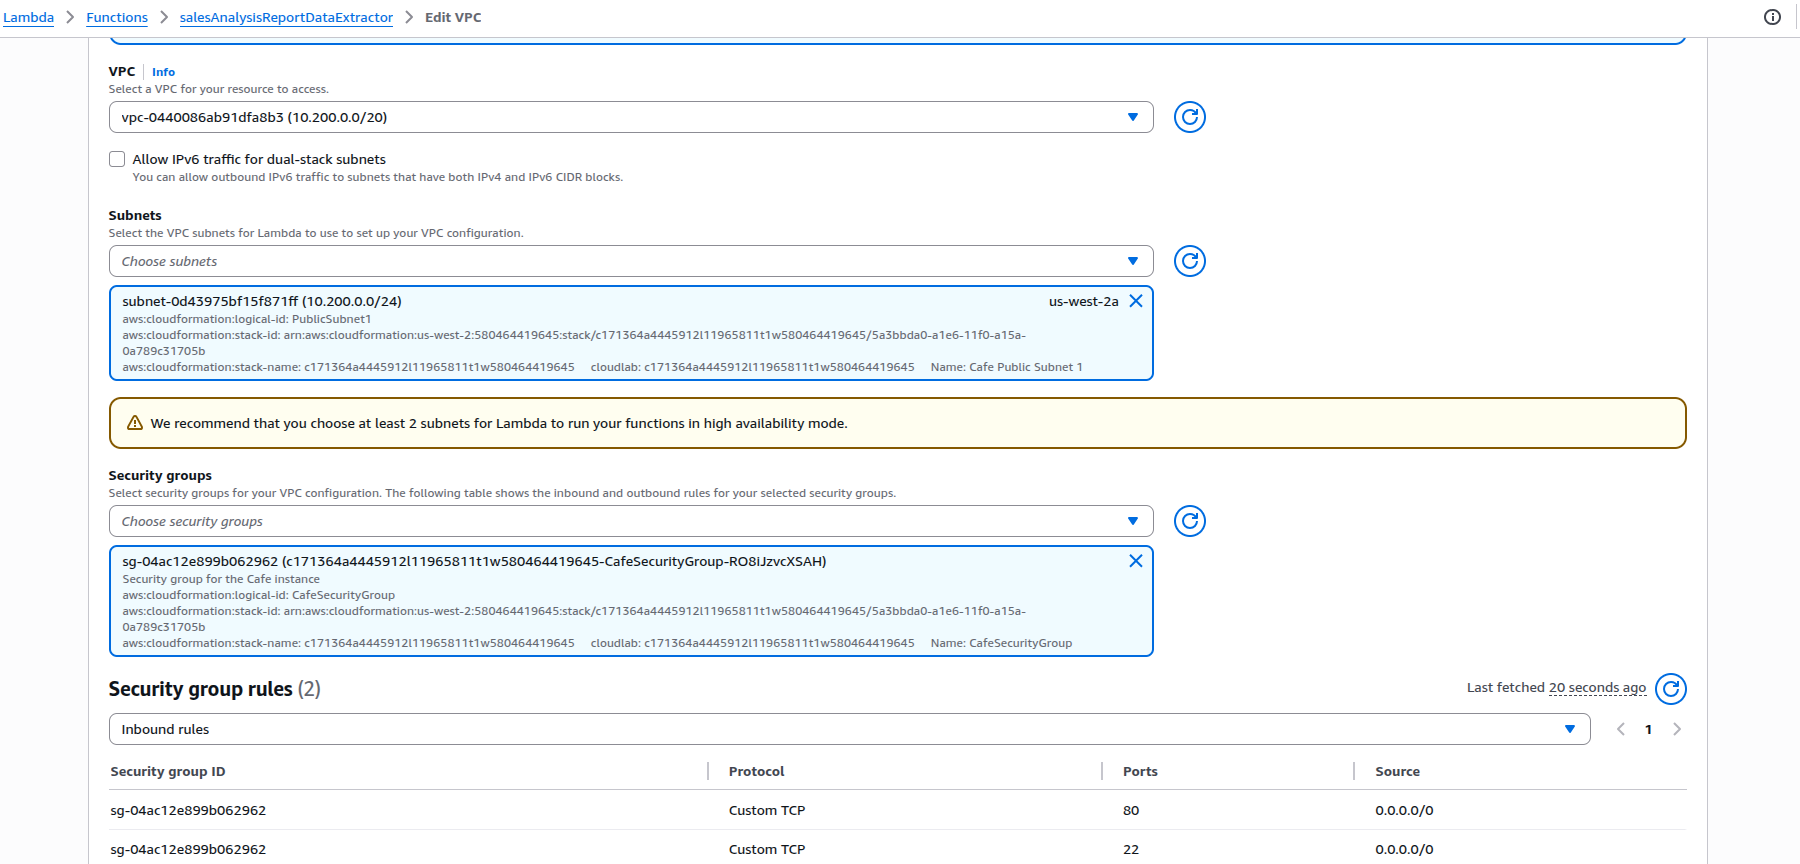

## Testing the data extractor Lambda function

### Launching a test of the Lambda function

- Go to Systems Manager > Parameter Store and copy some values needed for testing
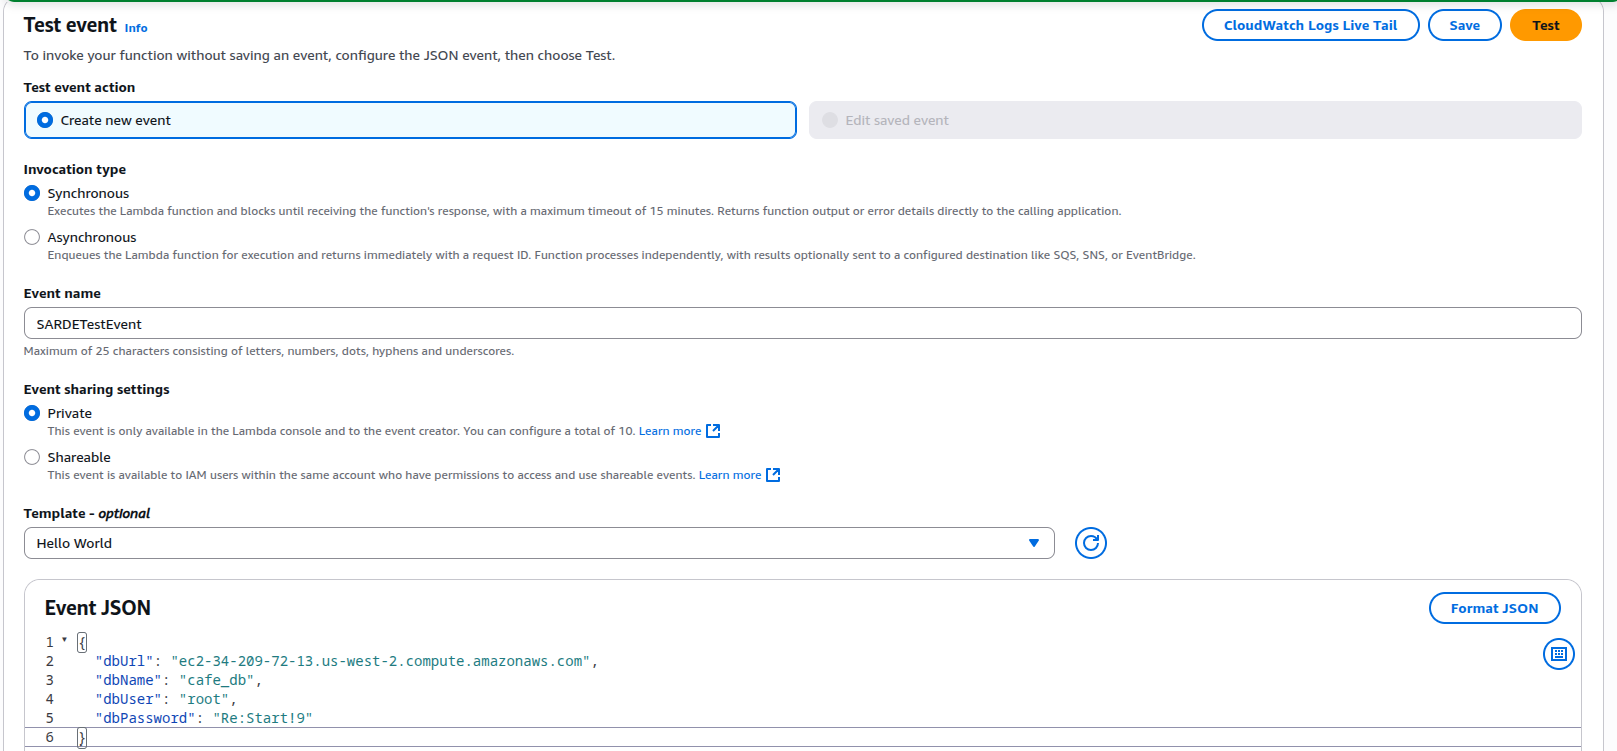

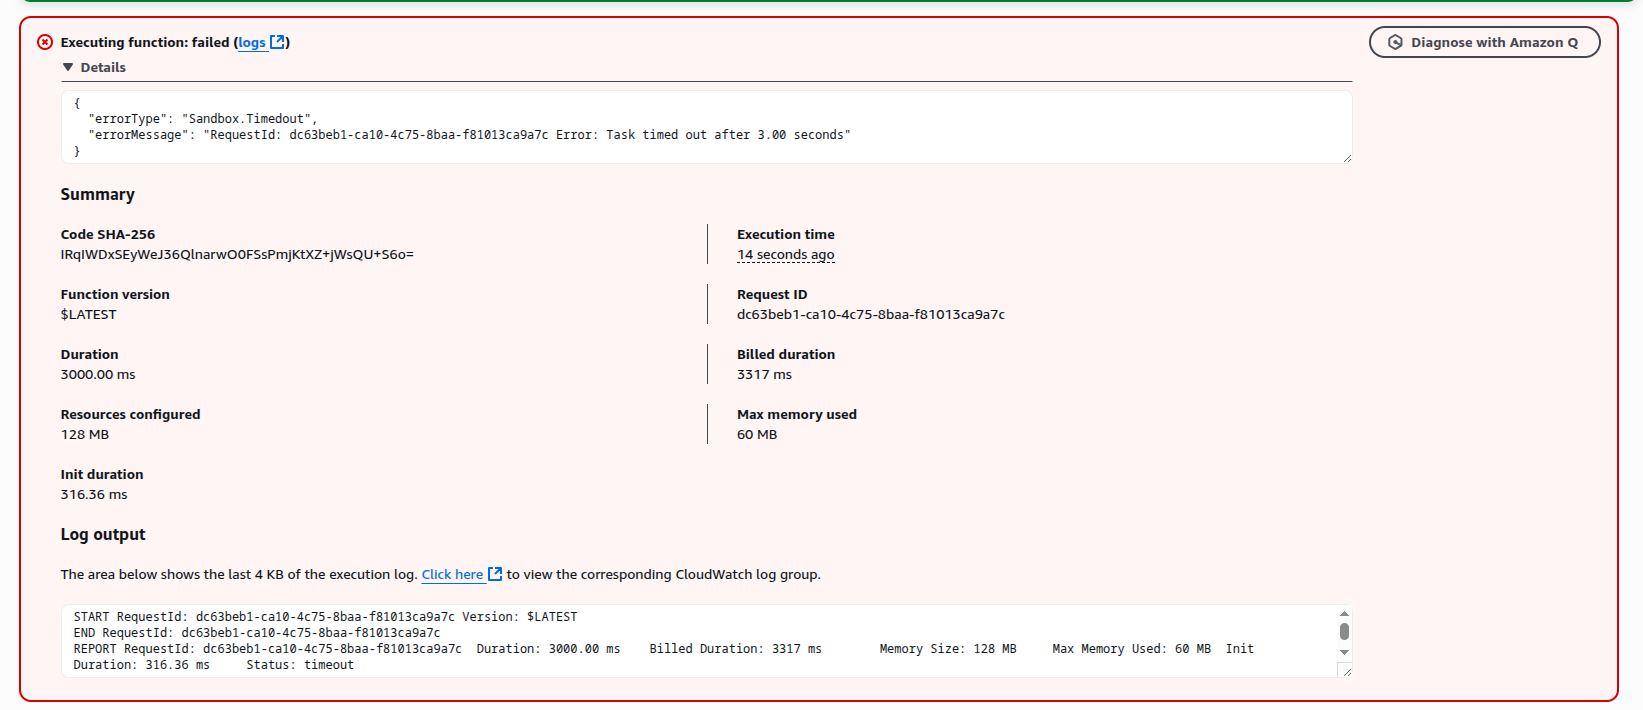

### Troubleshooting the Error
- The code connect to a MySQL server, which is port **3306**. Checking the VPC, we see that there are no Inbound Rules for that port number

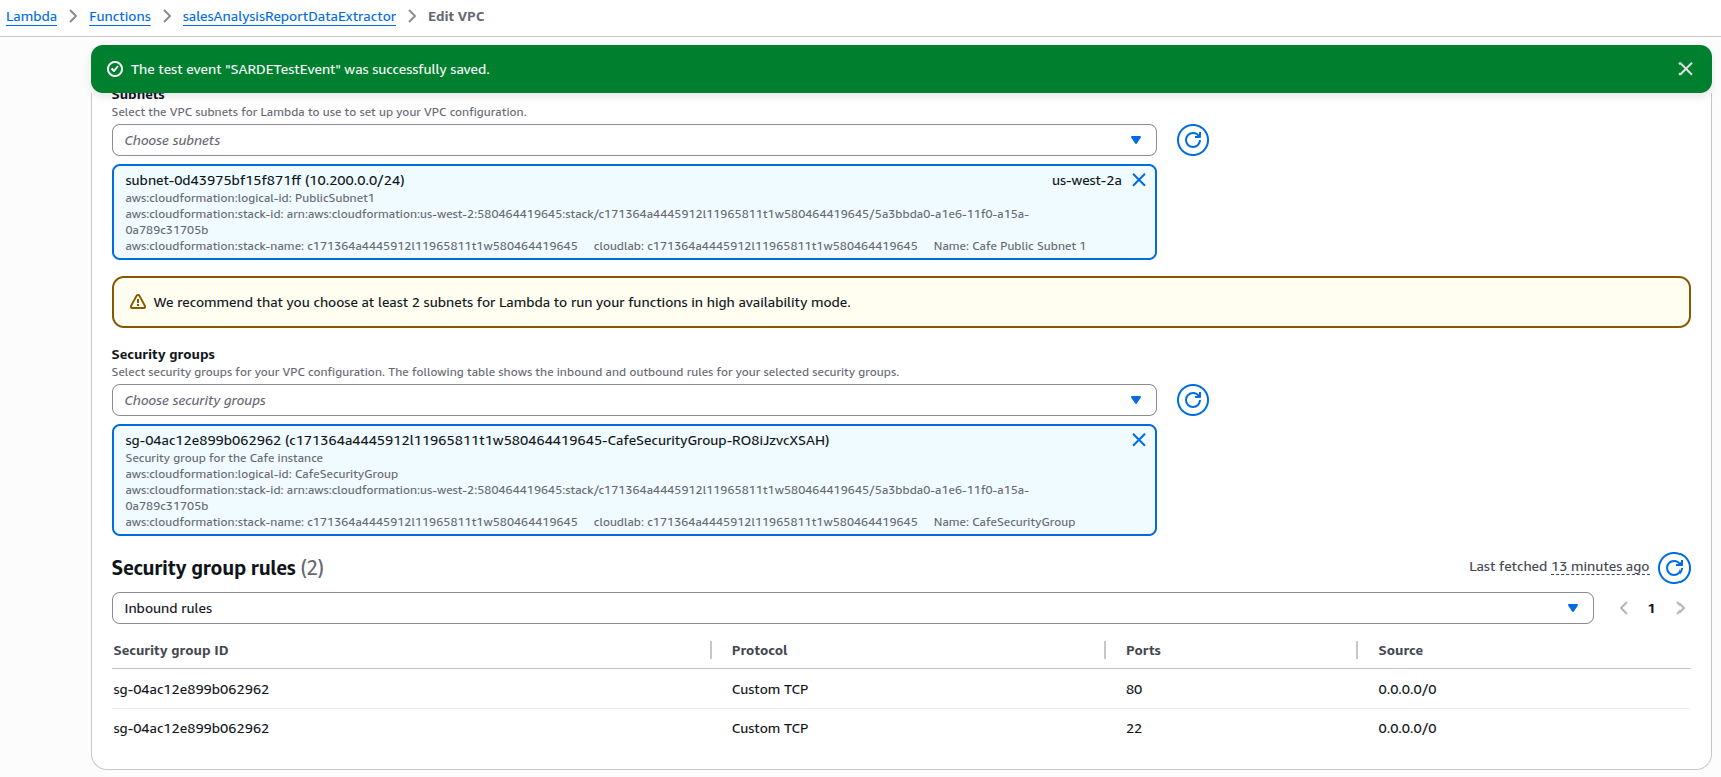

- **Solution**: Add to the VPC an inbound rule for MySQL.

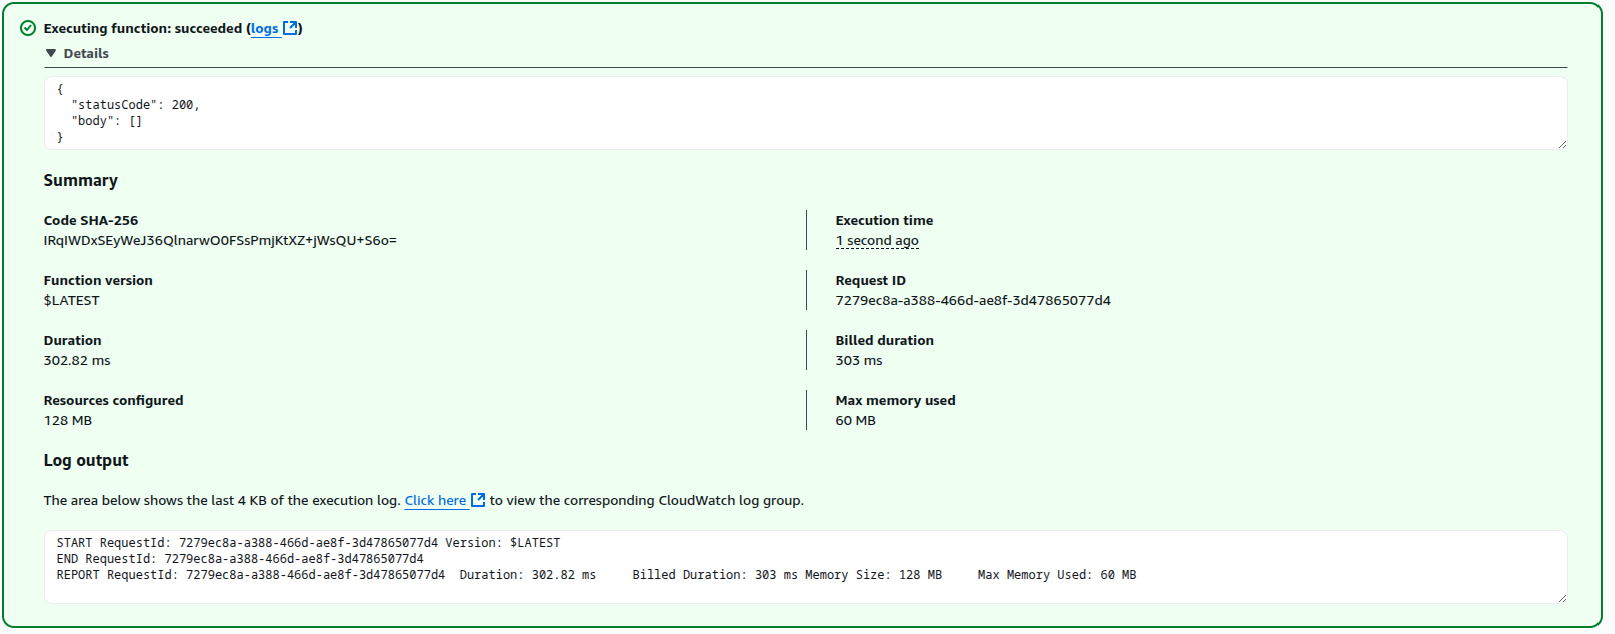



## Testing the Function with Populated Database

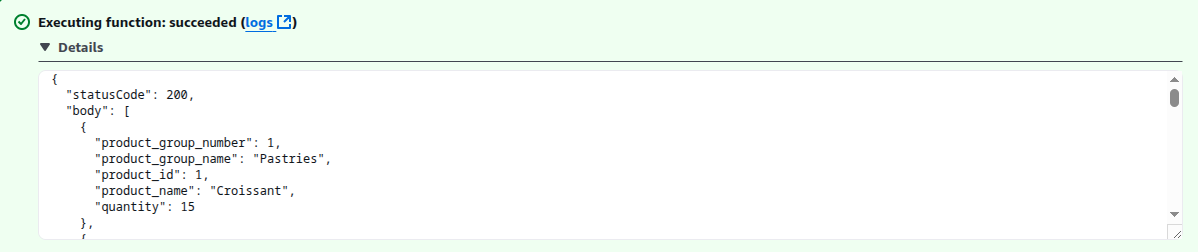

## Configuring notifications

### Creating an SNS Topic

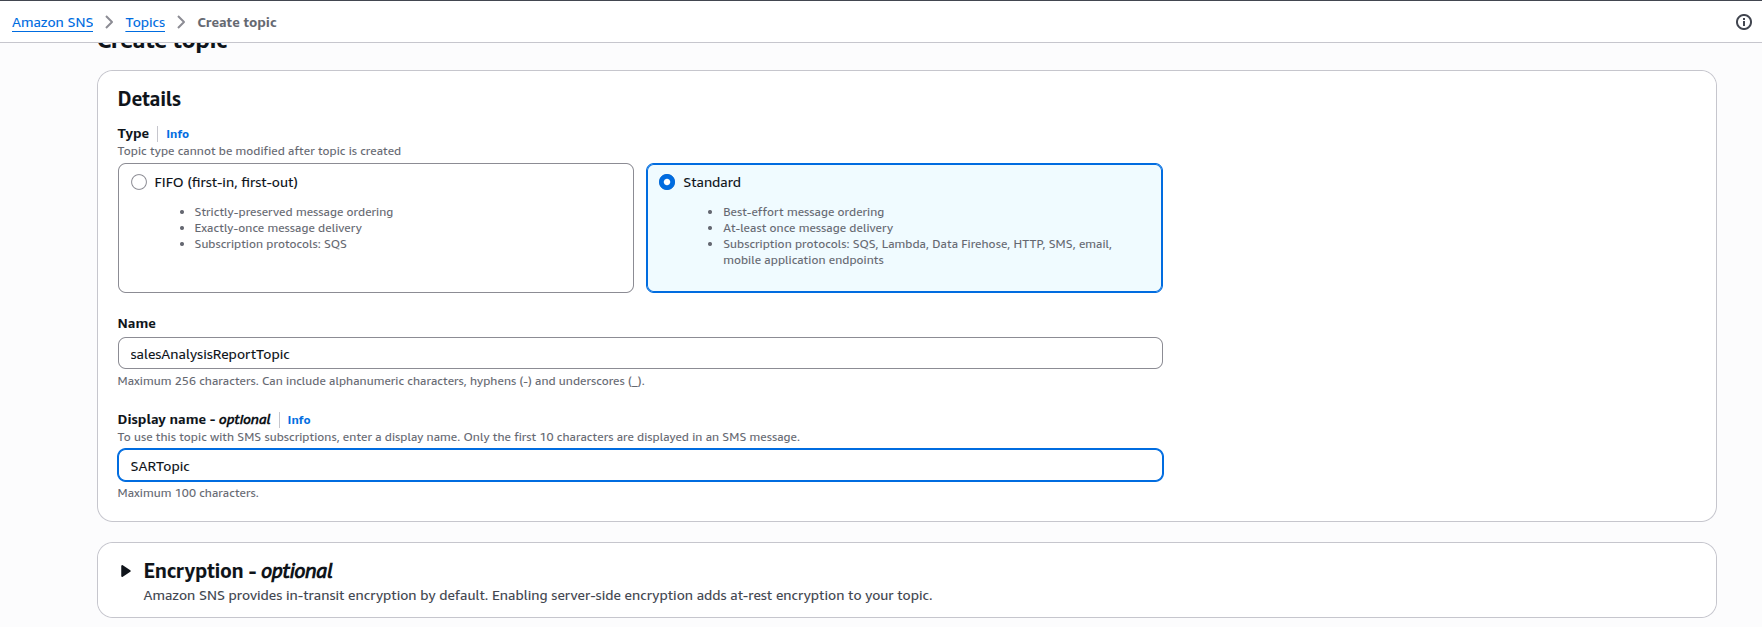

- When created, copy and paste the ARN value into a text document.

### Subscribing to the SNS Topic

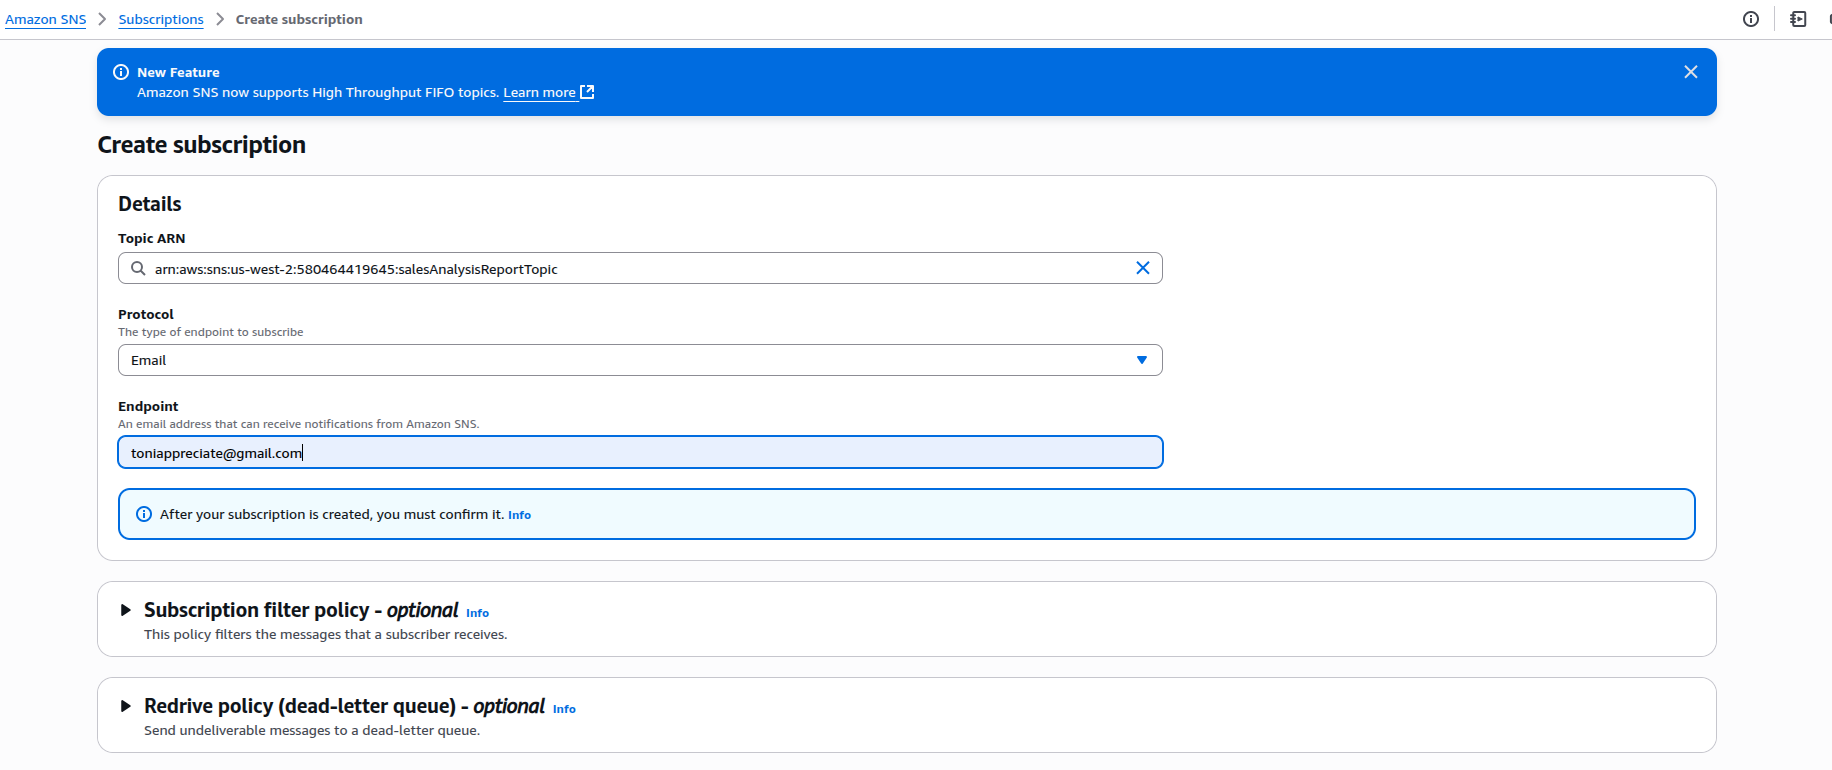

## Creating the `salesAnalysisReport` Lambda function

### Create

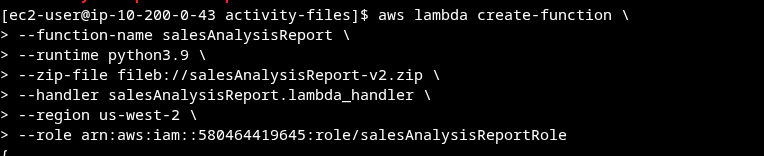

### Returned

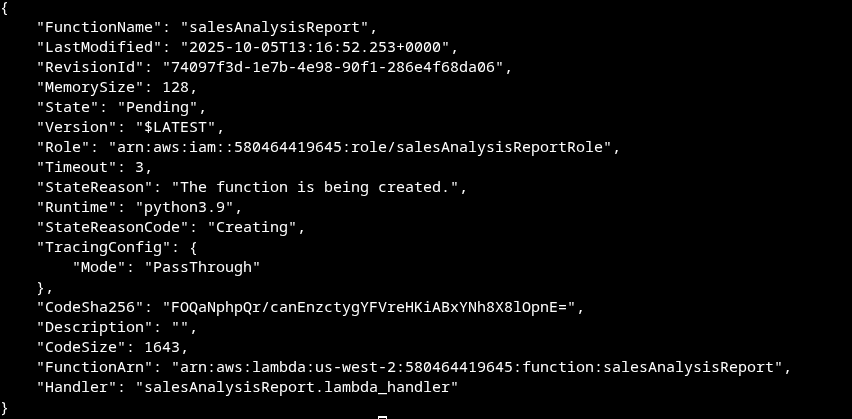

### Configuring the Function

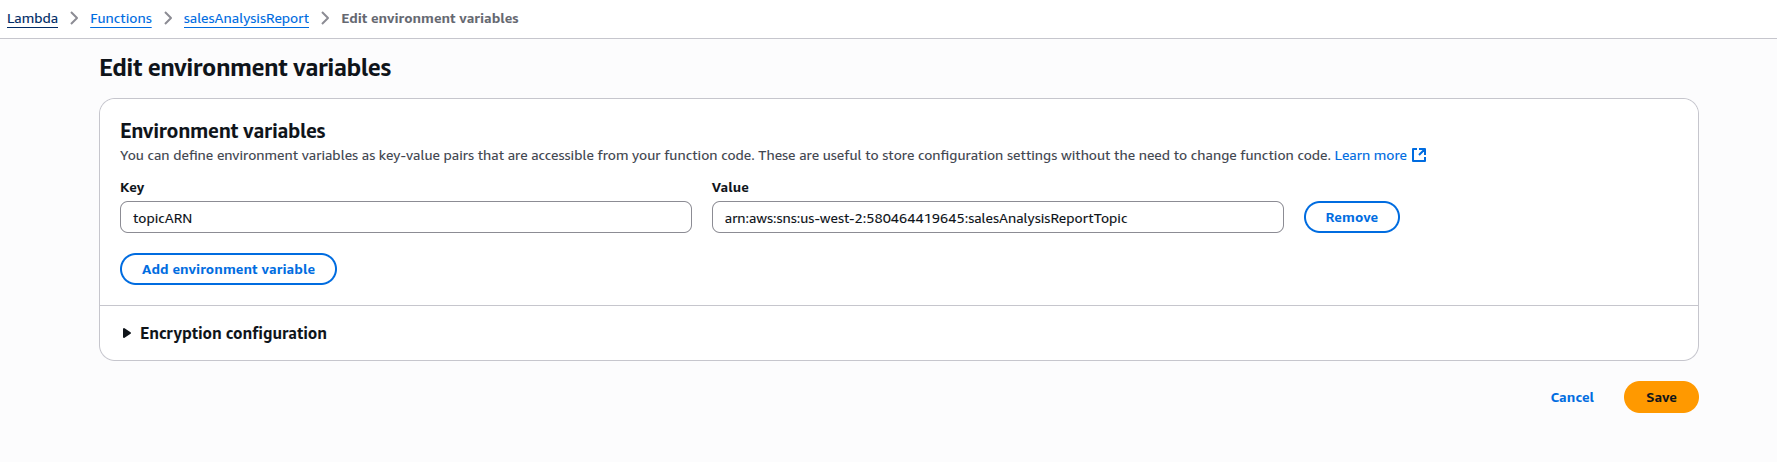

### Testing

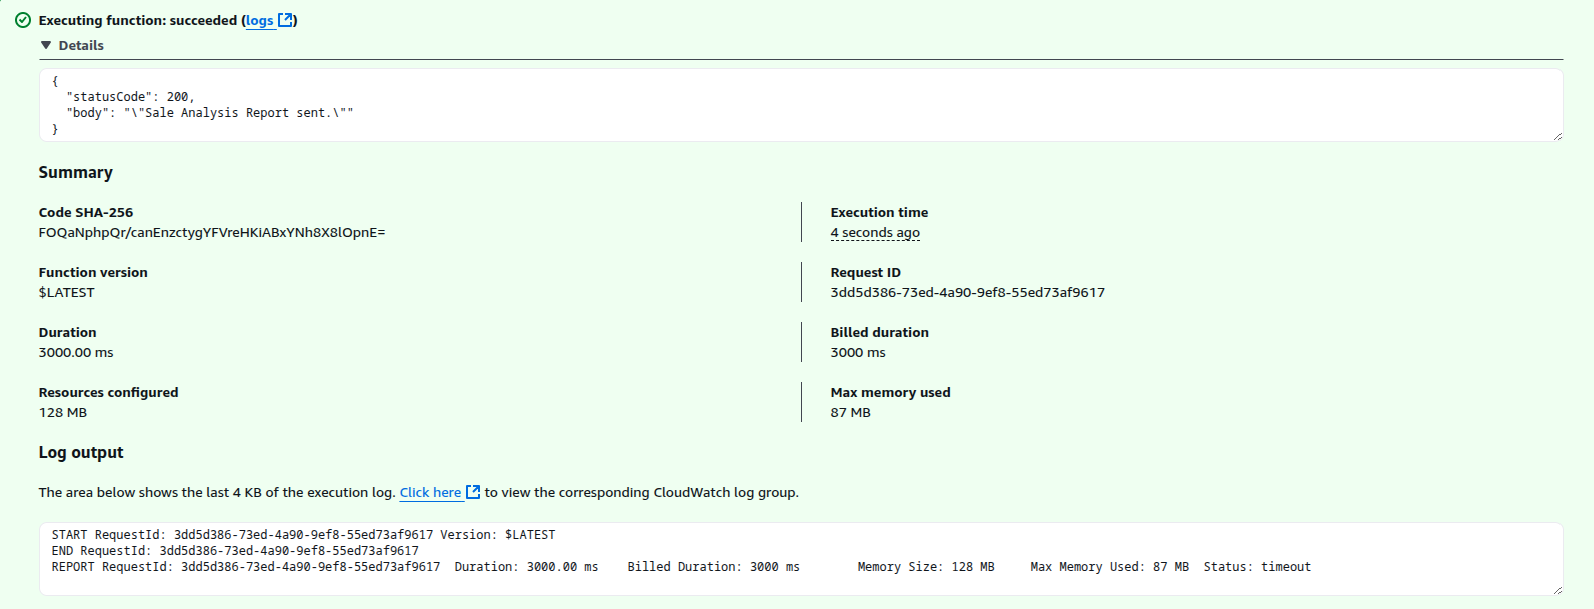

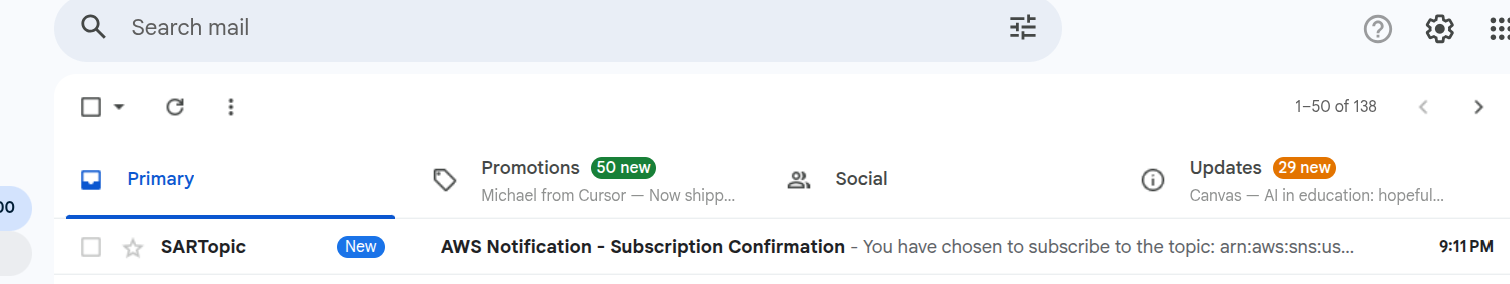

# Lab 178 - AWS Lambda Exercise (Challenge)

## Development

### Initial Configuration

Using `hello_world` template

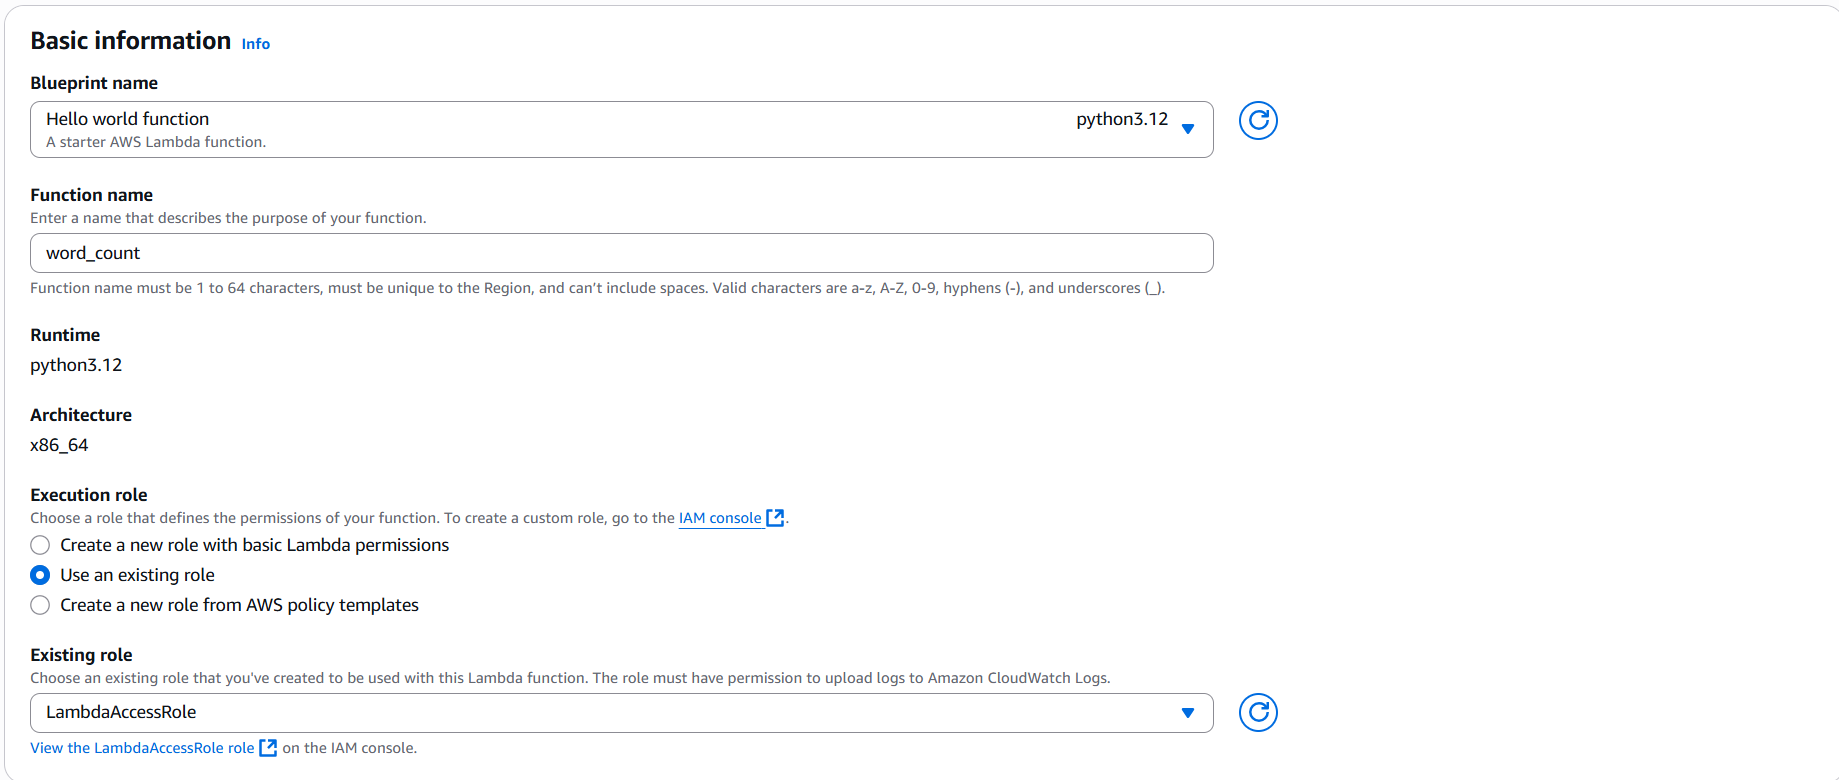

Then, the *Configuration* tab

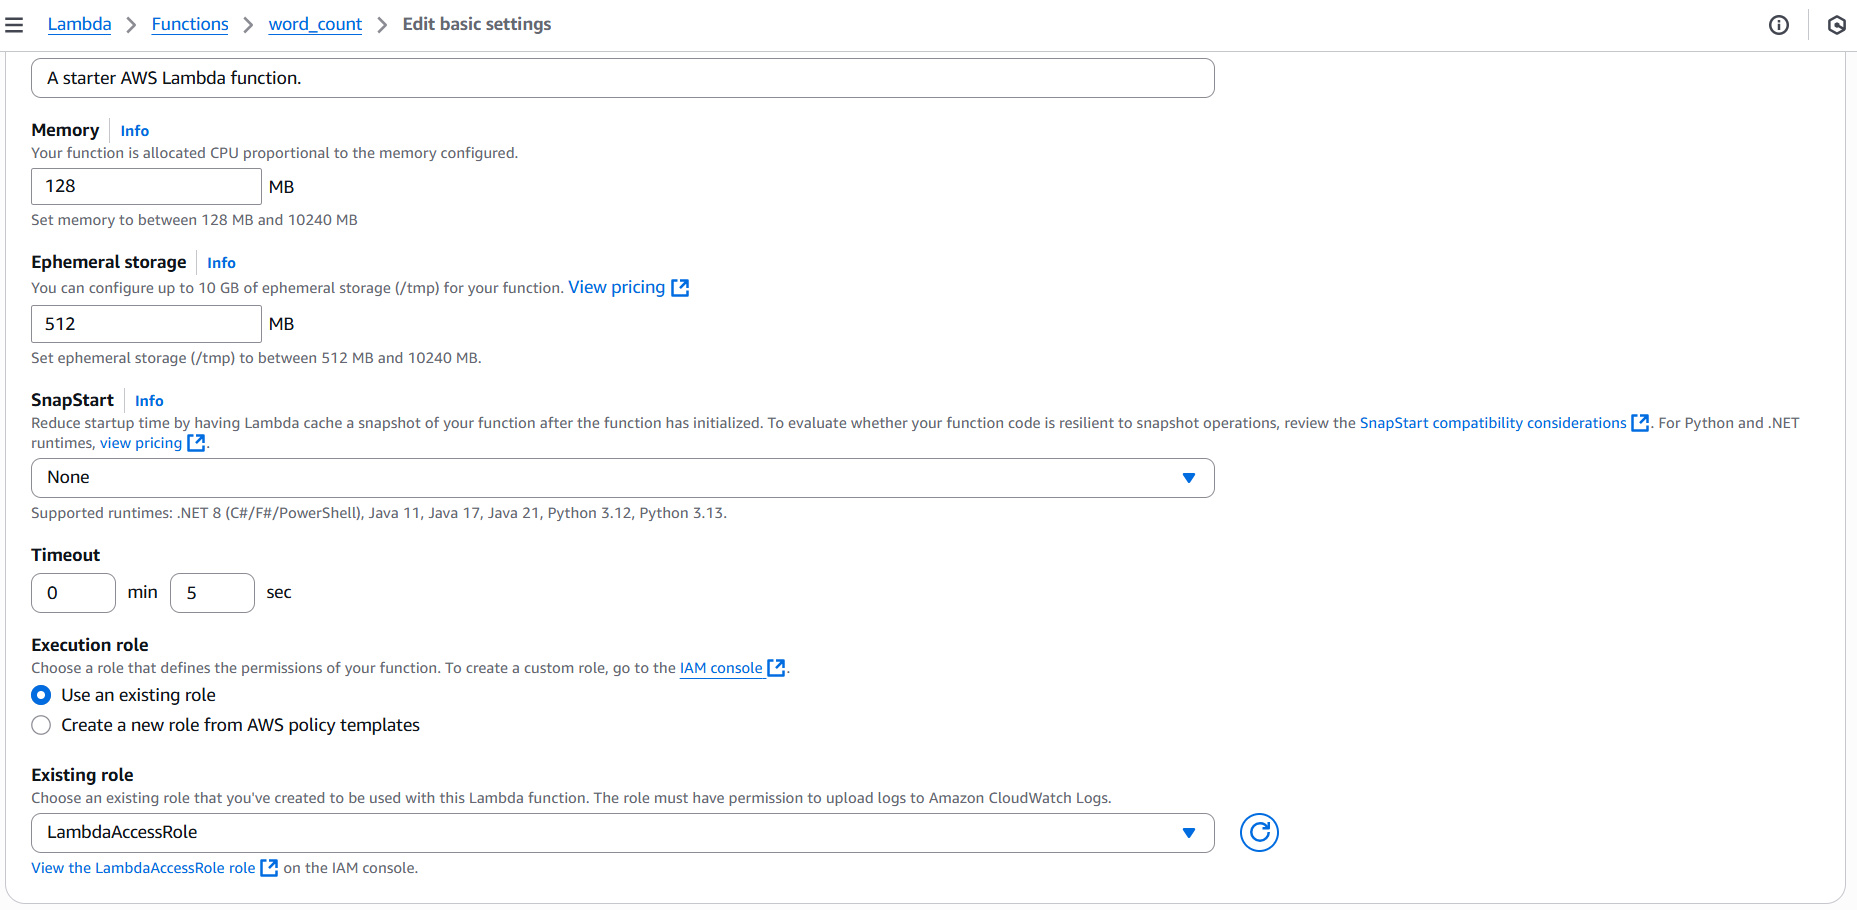

### Code

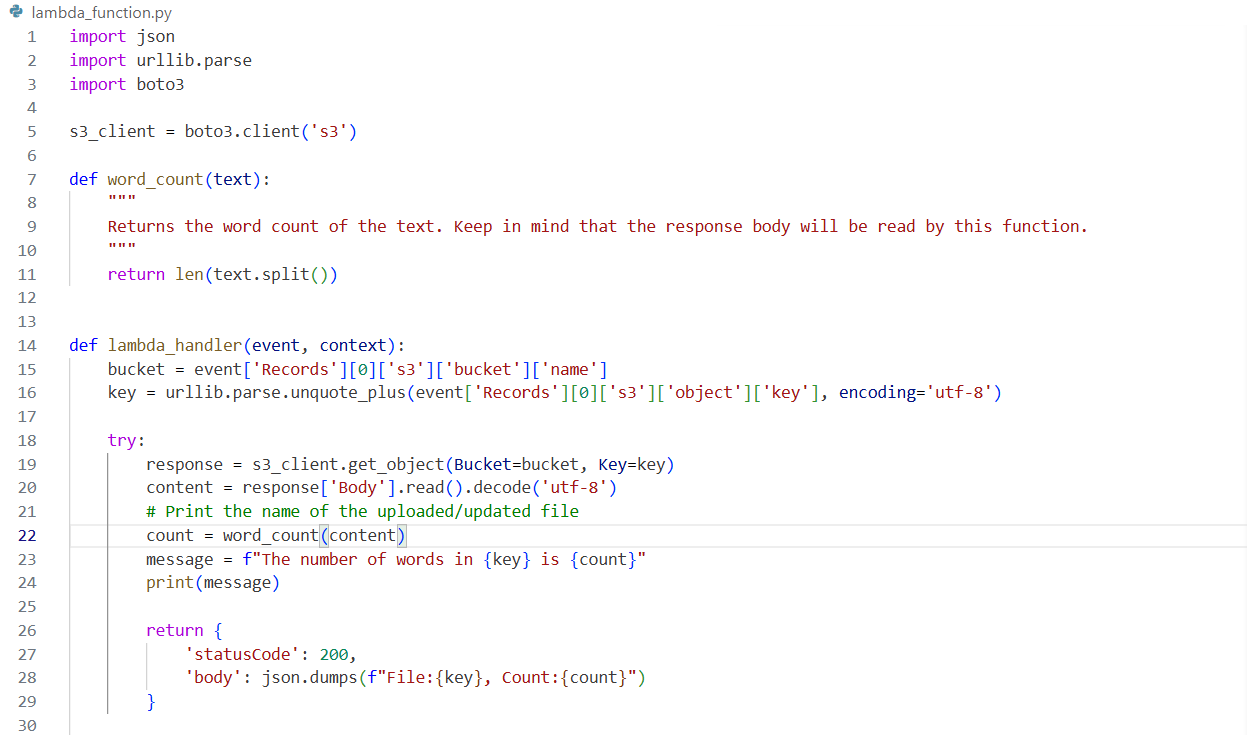

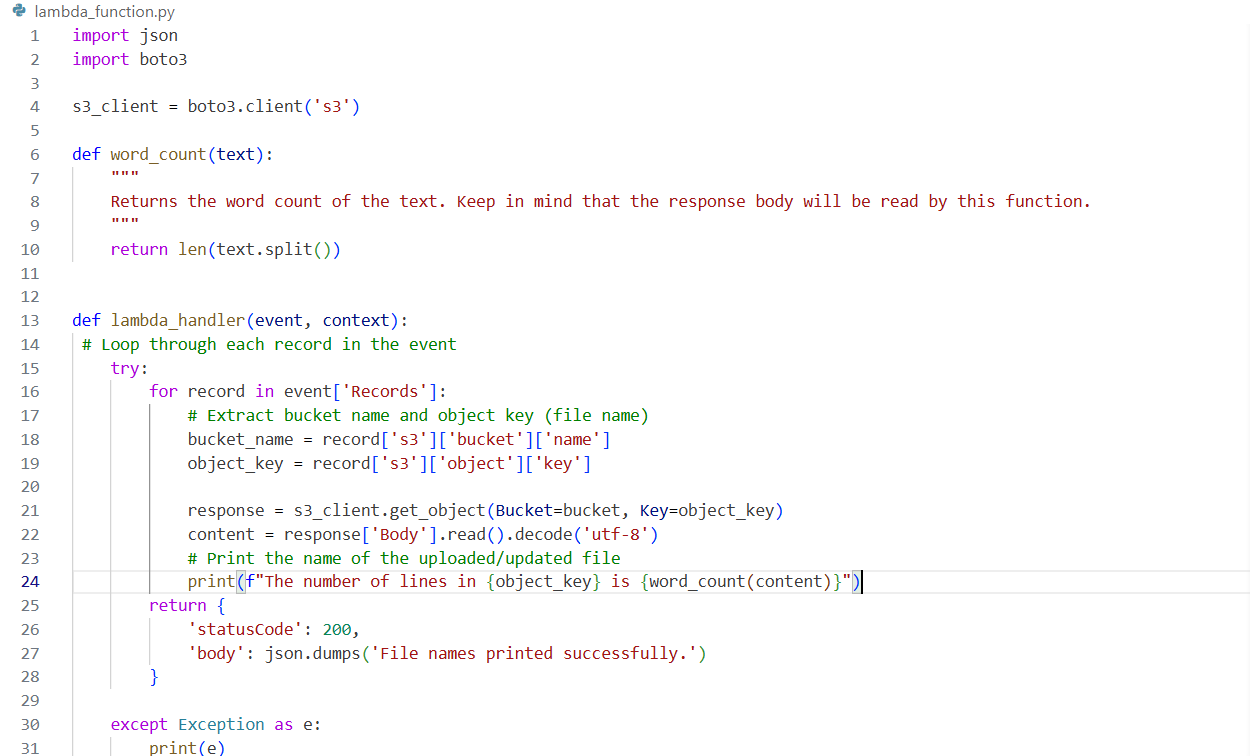

### Create Bucket

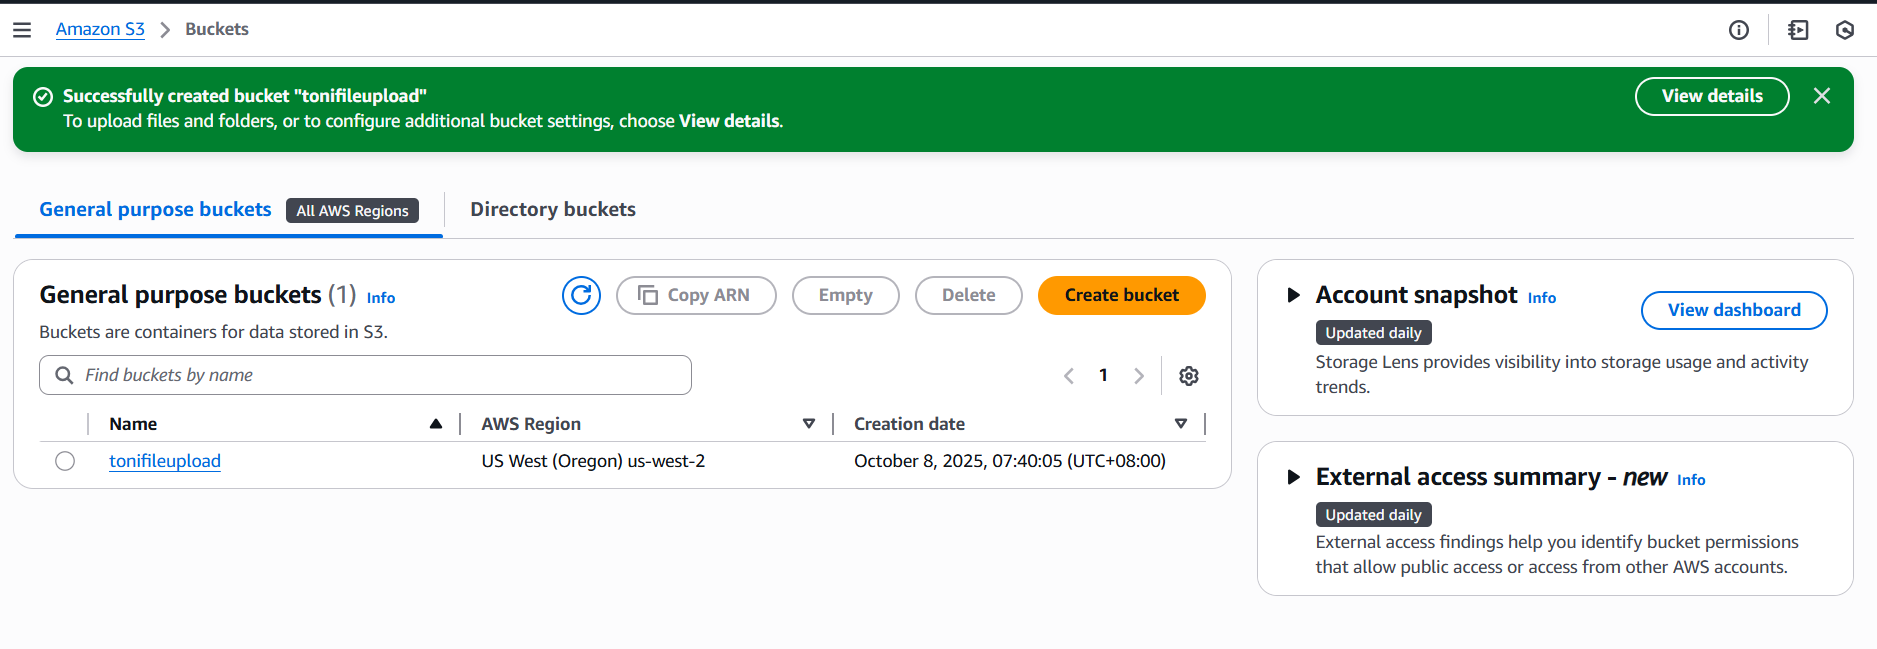

### Create Permission Policy in IAM

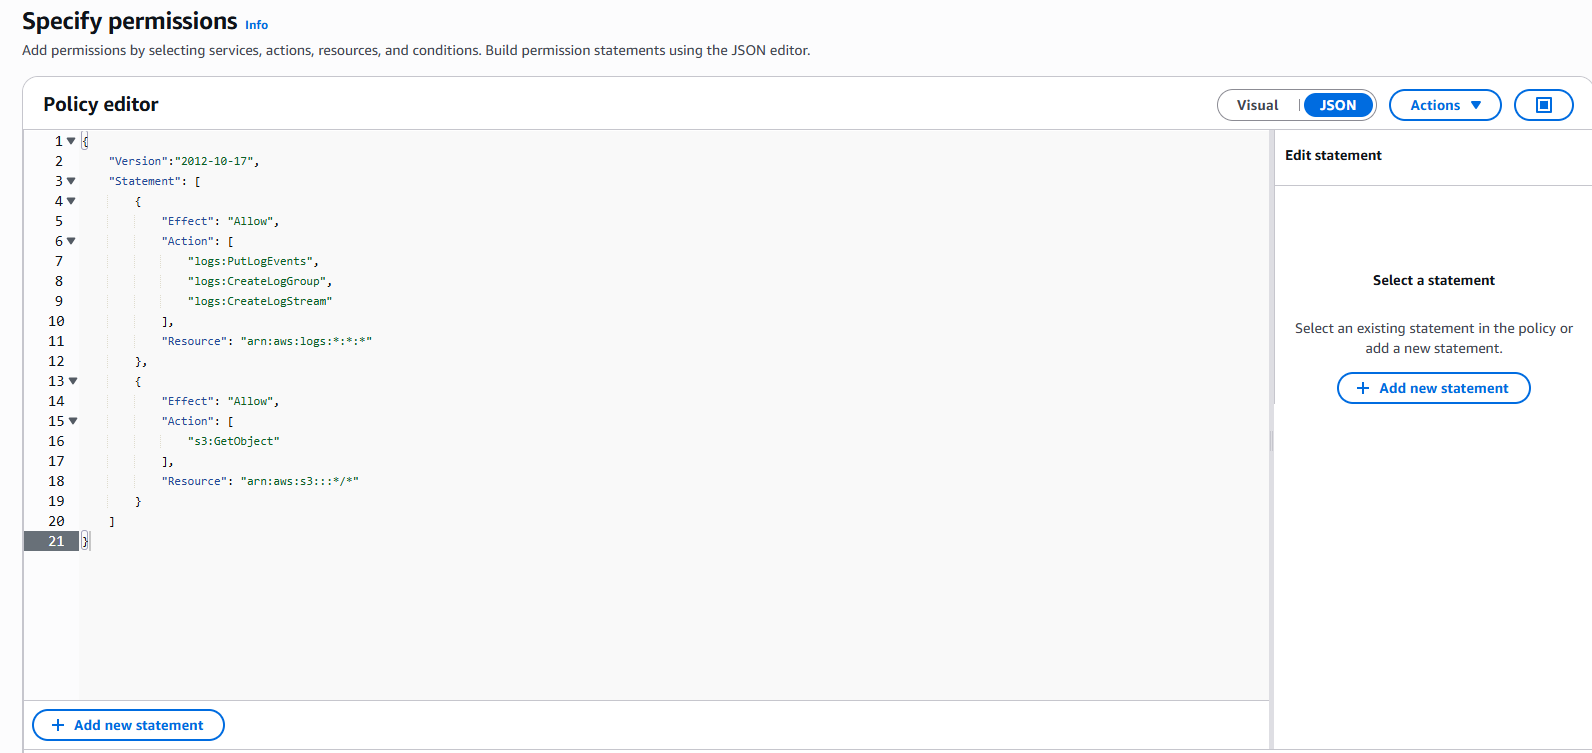

### Add Event Trigger for Bucket Upload

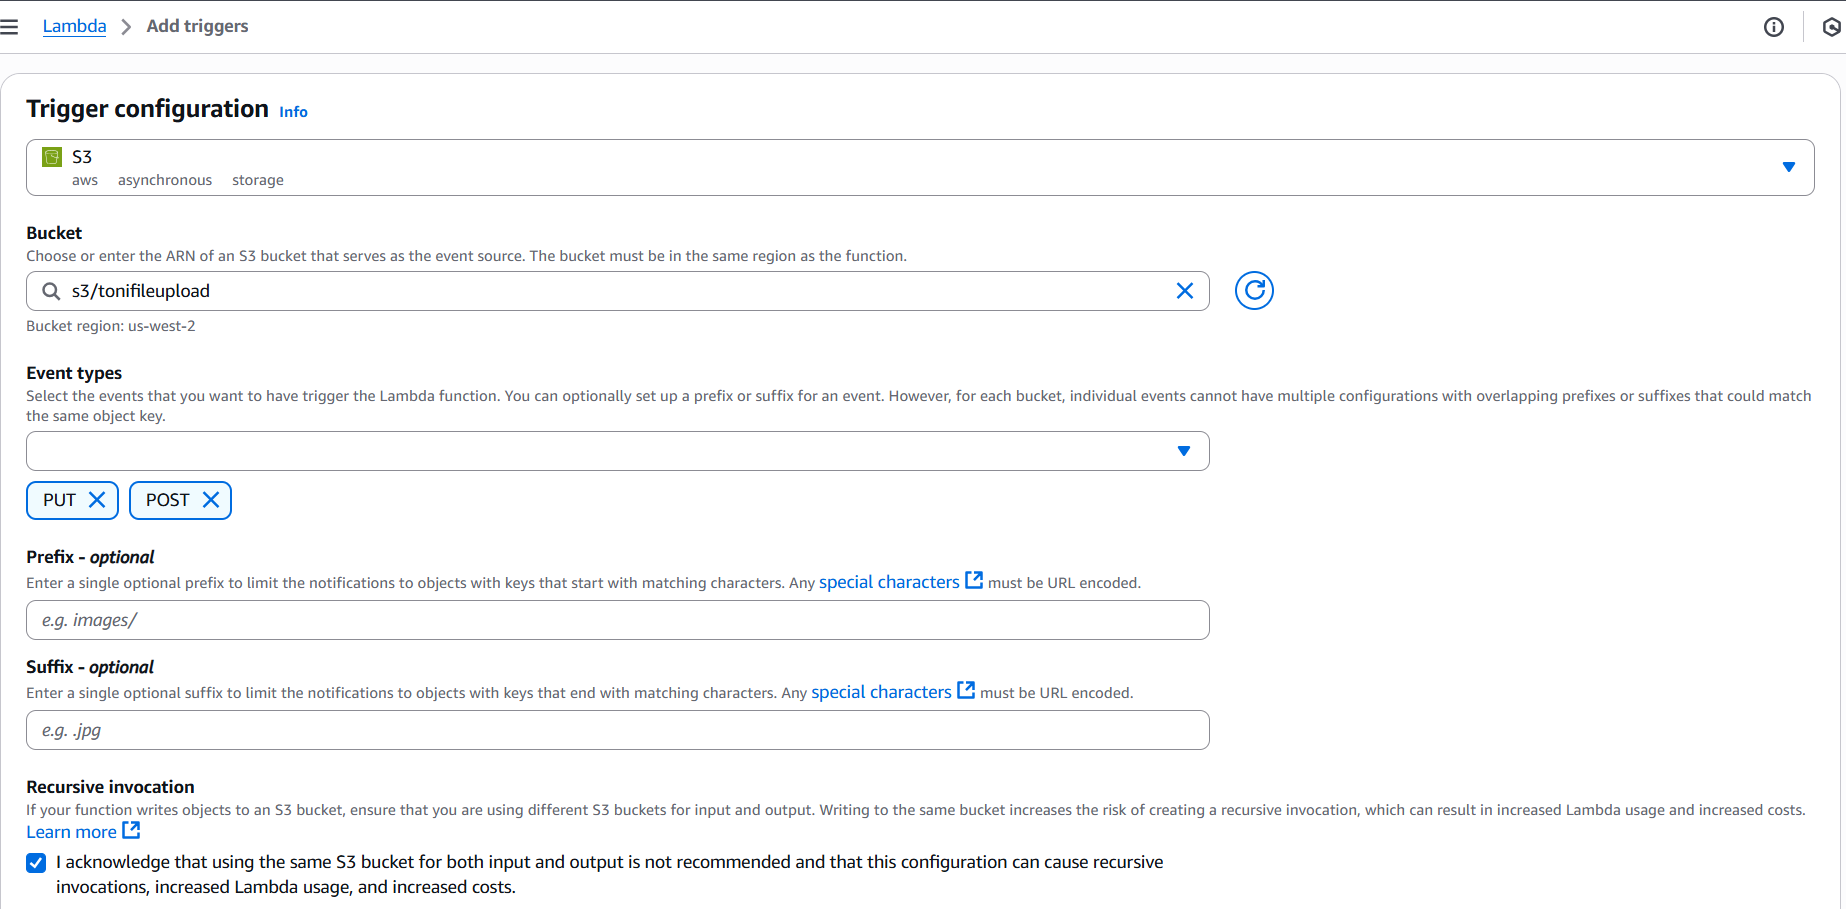



## Testing

### File upload

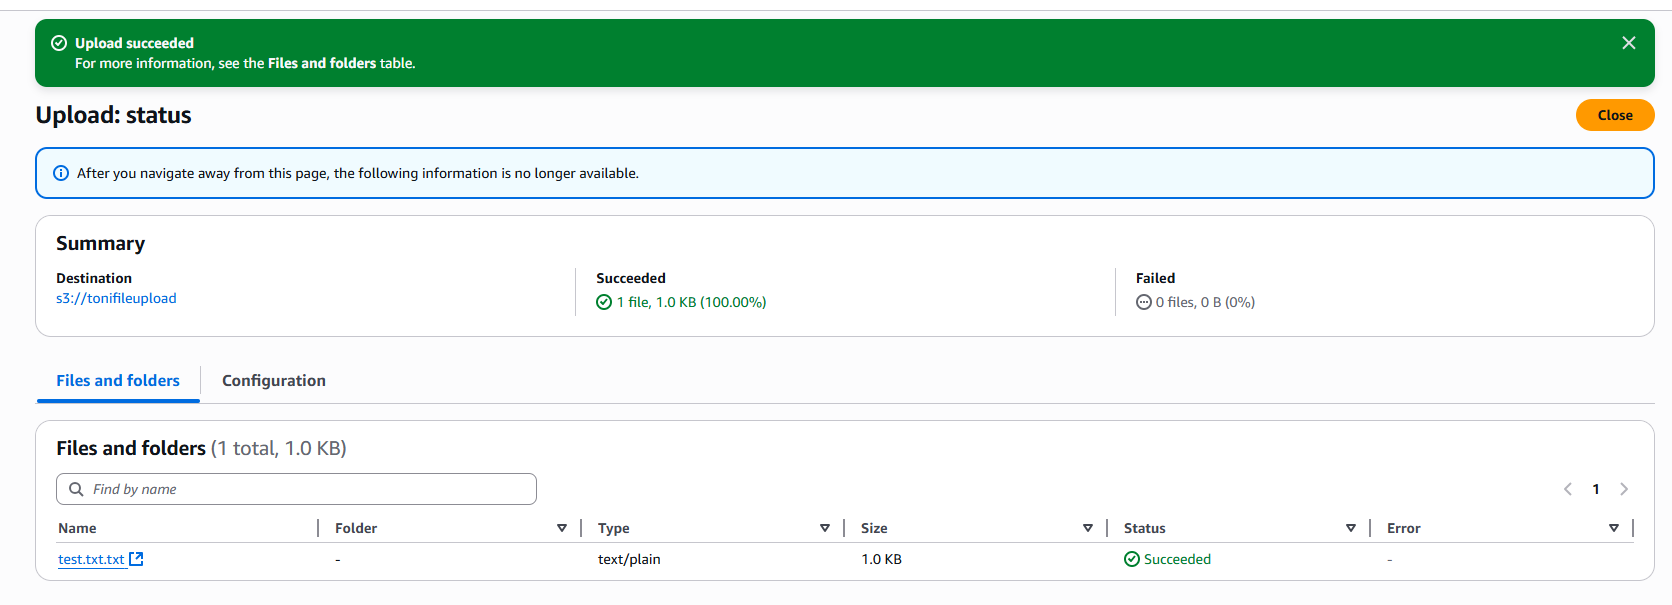

### Test JSON


```json
{
  "Records": [
    {
      "eventVersion": "2.0",
      "eventSource": "aws:s3",
      "awsRegion": "us-west-2",
      "eventTime": "1970-01-01T00:00:00.000Z",
      "eventName": "ObjectCreated:Put",
      "userIdentity": {
        "principalId": "EXAMPLE"
      },
      "requestParameters": {
        "sourceIPAddress": "127.0.0.1"
      },
      "responseElements": {
        "x-amz-request-id": "EXAMPLE123456789",
        "x-amz-id-2": "EXAMPLE123/5678abcdefghijklambdaisawesome/mnopqrstuvwxyzABCDEFGH"
      },
      "s3": {
        "s3SchemaVersion": "1.0",
        "configurationId": "testConfigRule",
        "bucket": {
          "name": "tonifileupload",
          "ownerIdentity": {
            "principalId": "EXAMPLE"
          },
          "arn": "arn:aws:s3:::tonifileupload"
        },
        "object": {
          "key": "test.txt.txt",
          "size": 1024,
          "eTag": "0123456789abcdef0123456789abcdef",
          "sequencer": "0A1B2C3D4E5F678901"
        }
      }
    }
  ]
}
```


### Test Results

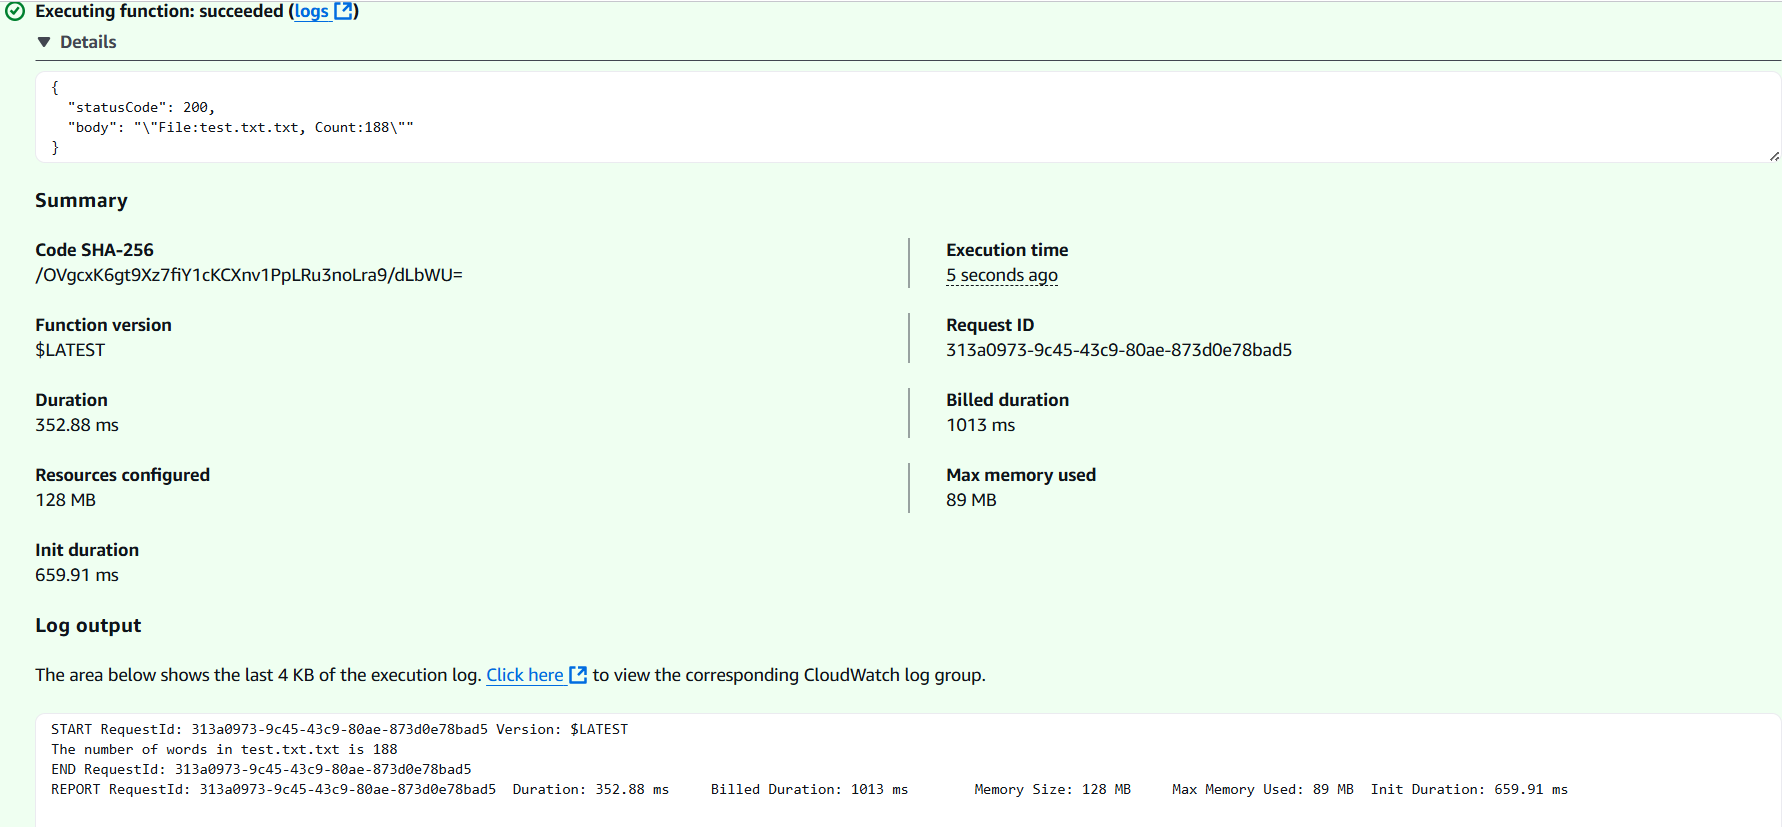

## Deployment

### Creating the SNS Topic

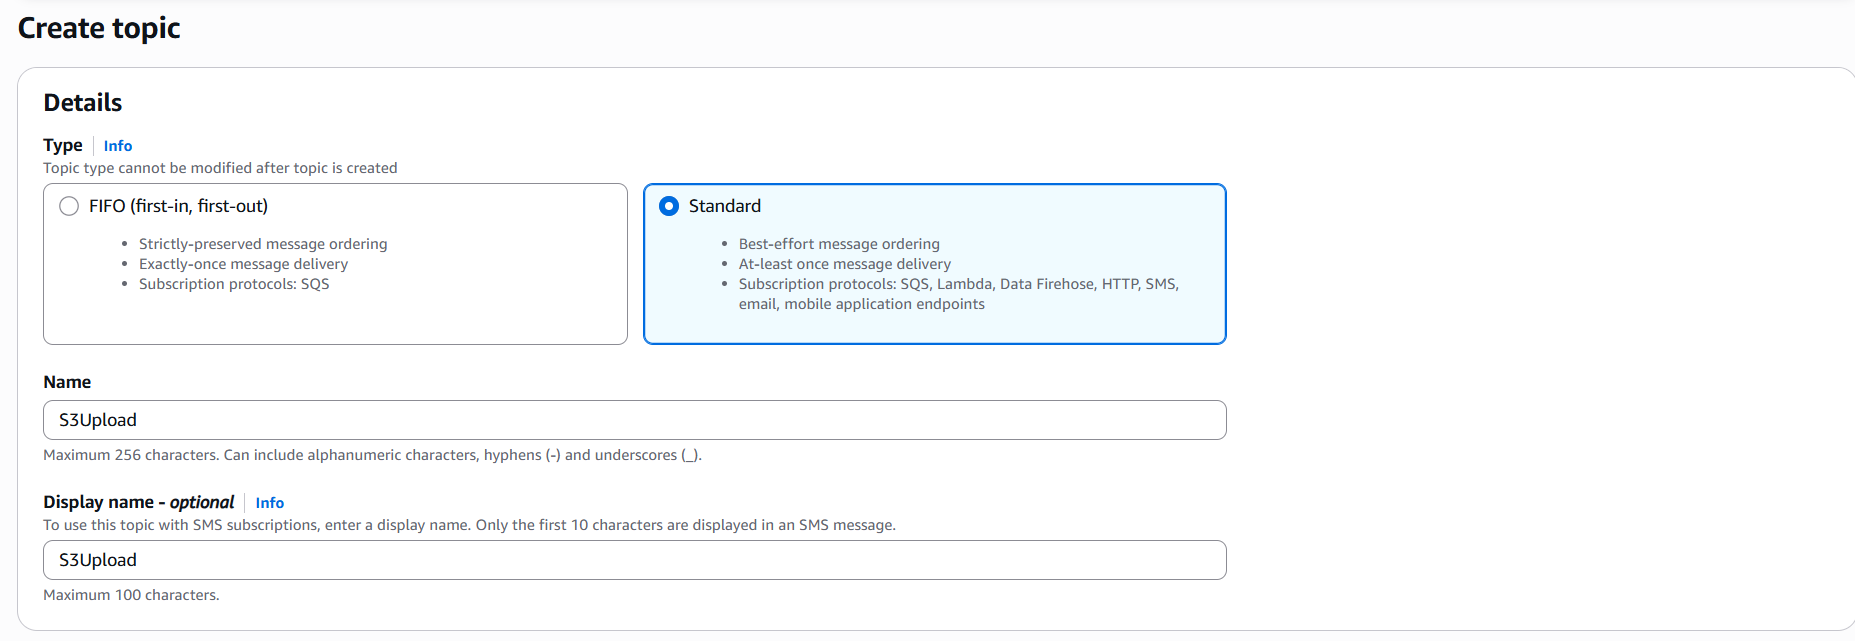

### Subscribing to the topic

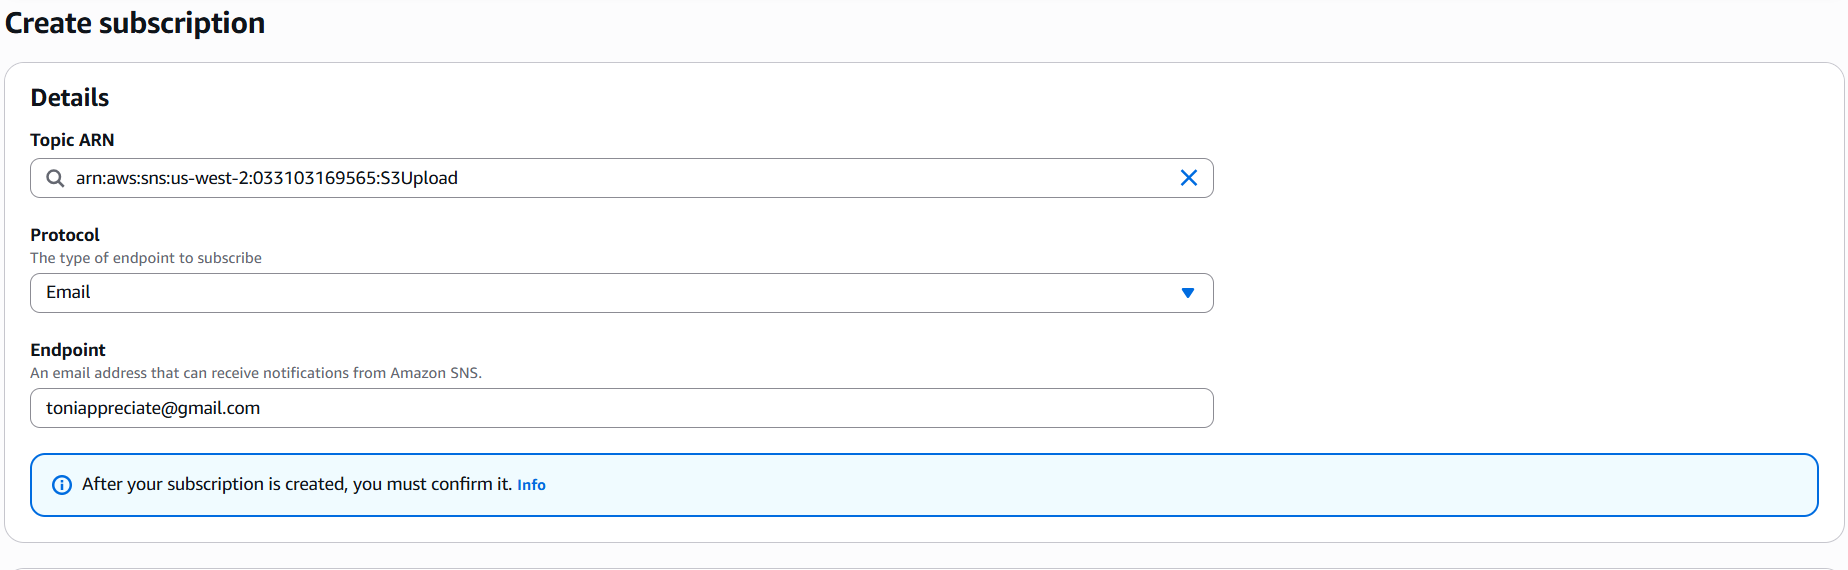

### Result

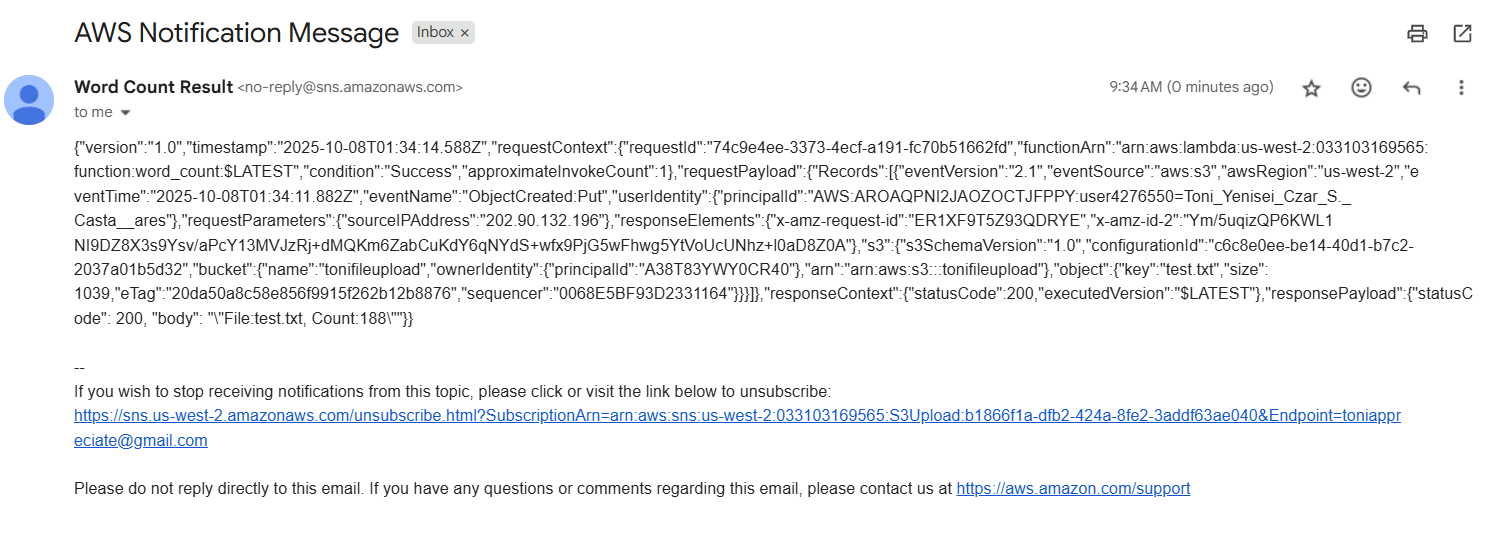

# APIs and REST

## API

- Provides programattic access to an application
    - The client application sends a request to the server application using the API.
    - THe server application returns the response to the client application.

- benefits:
    - Provides access to an application's functions without a GUI
    - Provides consistent way to invoke an application's functions

## Restful API

- Designed for loosely coupled network-based applications

- Communicates over HTTP
- Exposes resources at specific URIs
- Most web API

### REST Design Principles

- The client should have a **uniform interface** to access the server.
    - A request should be made to a single endpoint or URI when it interacts with each distinct resource that is part of the service. 

    - The interface does not define the structure of what is returned when the client makes a request.

- **Stateless** - The server does not track which requests the connecting client has made over time.
    - It also does not keep track of which step the client might have completed in terms of a series of actions.

    - Instead, any session information about the client is known only to the client itself.

- **Cacheable** - Clients cache responses that they recieve from REST servers.

- **Support Layered Systems** where the client might connect to an immediate server. 
    - The REST Server can be distributed, which supports **load balancing**.

- **Code on Demand** (Optional) - The server could pass code to the client. Not widely adopted but an optional component.



### RESTful Components

- **Client** - Users who access the information.

- **Resource** - Informatiion provided to client.

- **Request** - Sent by client to server in a format the server understands

- **Response** - Returned by server, which includes a *status message*, a *message body*, and *metadata*.

### REST Request Format

- **Endpoint** - In a form of a URL, which provides a way for the client to notify the server about the resources that it wants to interact with.

- **Method** 
    - *GET* - Server requested to retrieve resource
    - *POST* - Server requested to create new resource
    - *PUT* - Update existing resource
    - *DELETE* - Obliterate that sh*t!

- **Header** - Contains the metadata
- **Request body** - The data the client sends to the server. A POST or PUT contains a body. GET rarely has it.

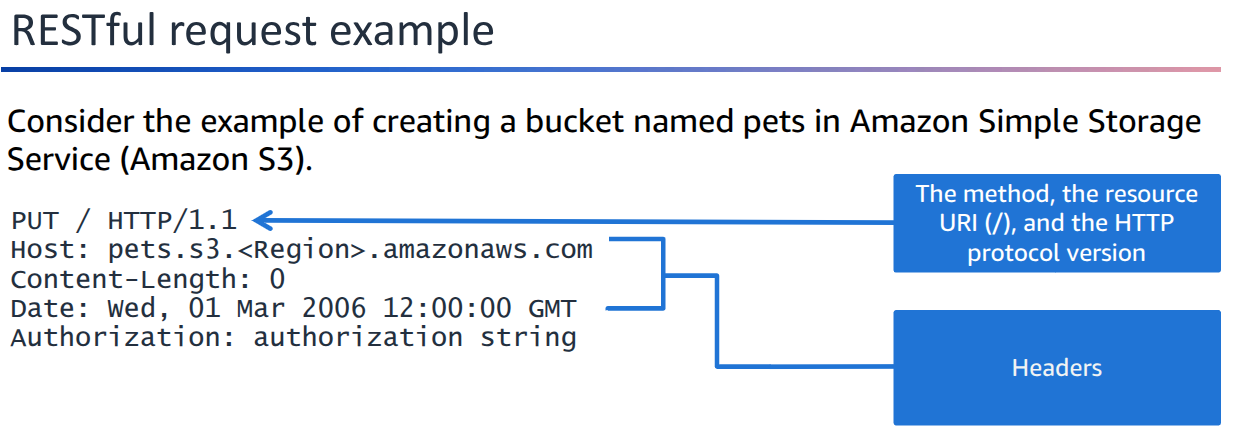

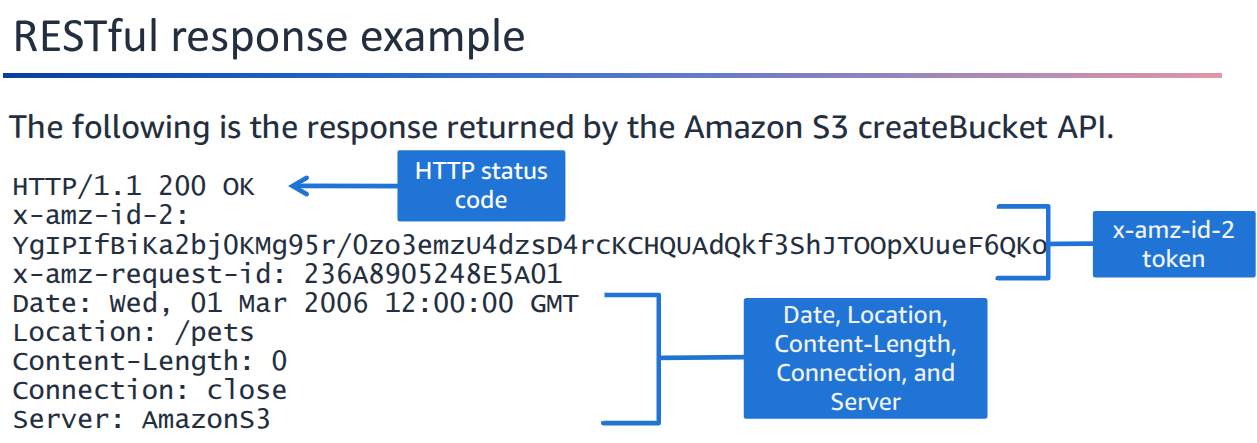

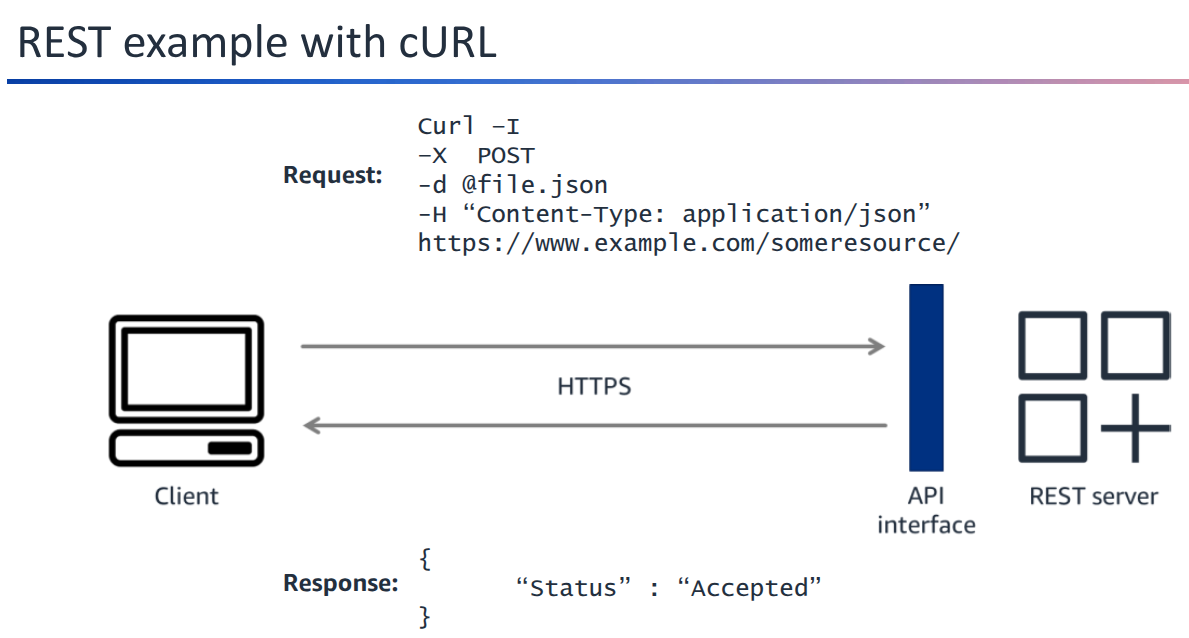

## HTTP Status Codes

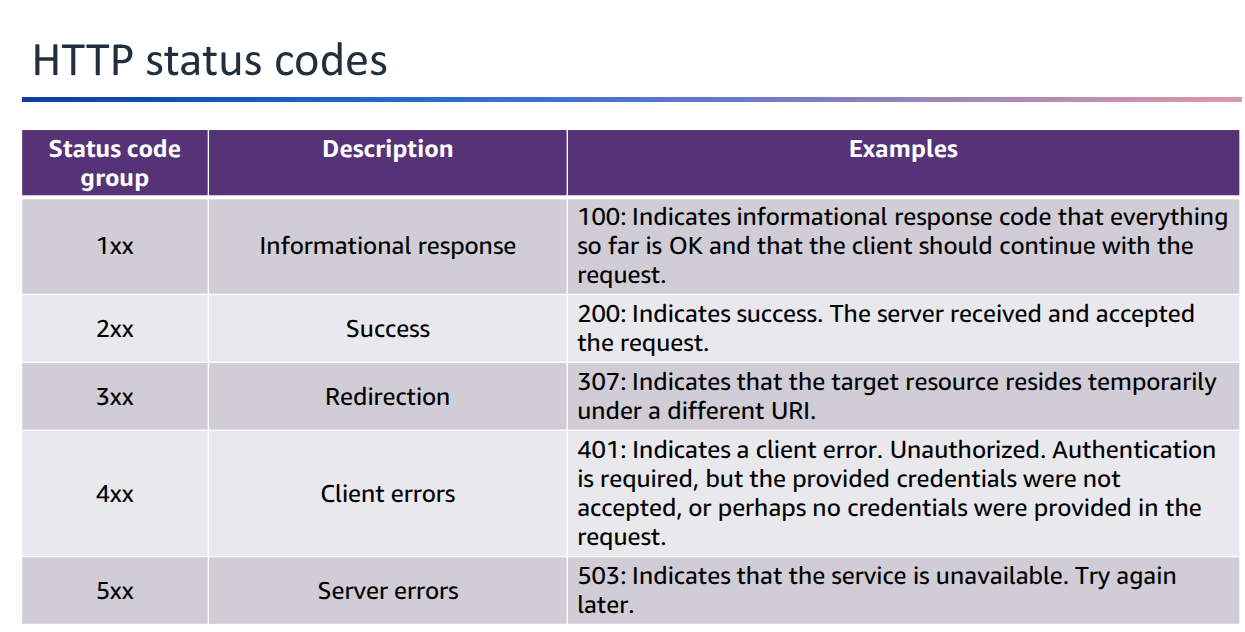

# Amazon API Gateway

- Use to create and maintain APIs.

- Handles:
    
    - Scaling

    - Access control
    - Monitoring 


### Benefits

- **Efficient API Development** - Run multiple versions of the same API simultaneously. Gives the ability to quickly iterate, test, release.

- **Performance at any scale** - Lowest possbile latency for requests and responses through edge locations using *Amazon CloudFront*.
- **Cost savings at scale** - Decrease API usage cost increase per Region using the tiered pricing model for requests.
- **Monitoring** - Metrics such as data latency, error rates, and others
- **Flexible secuiry controls** - Authorize access through IAM and *Cognito*.
- **RESTful API options** - HTTP APIs are best for majority of use cases due to being signficantly cheaper versus REST APIs.

## API Gateway Architecture

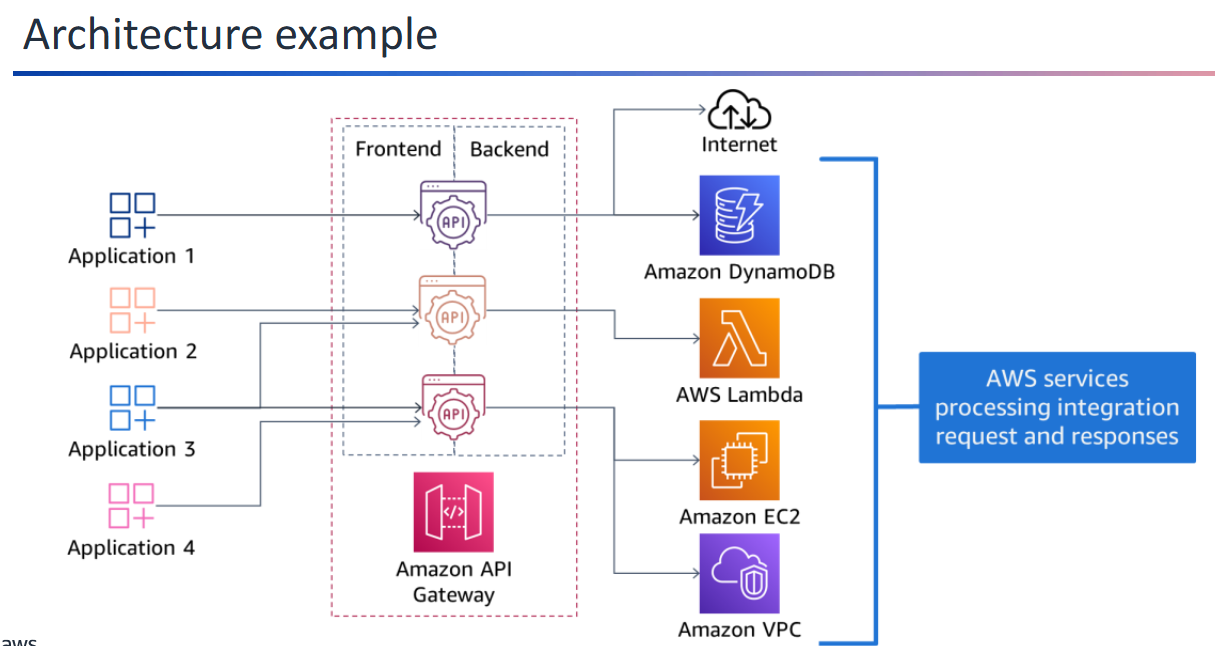

- API frontend is used to make requests

- The parts of the API implementation that communicate with the AWS services is the API backend.

## API Gateway Use

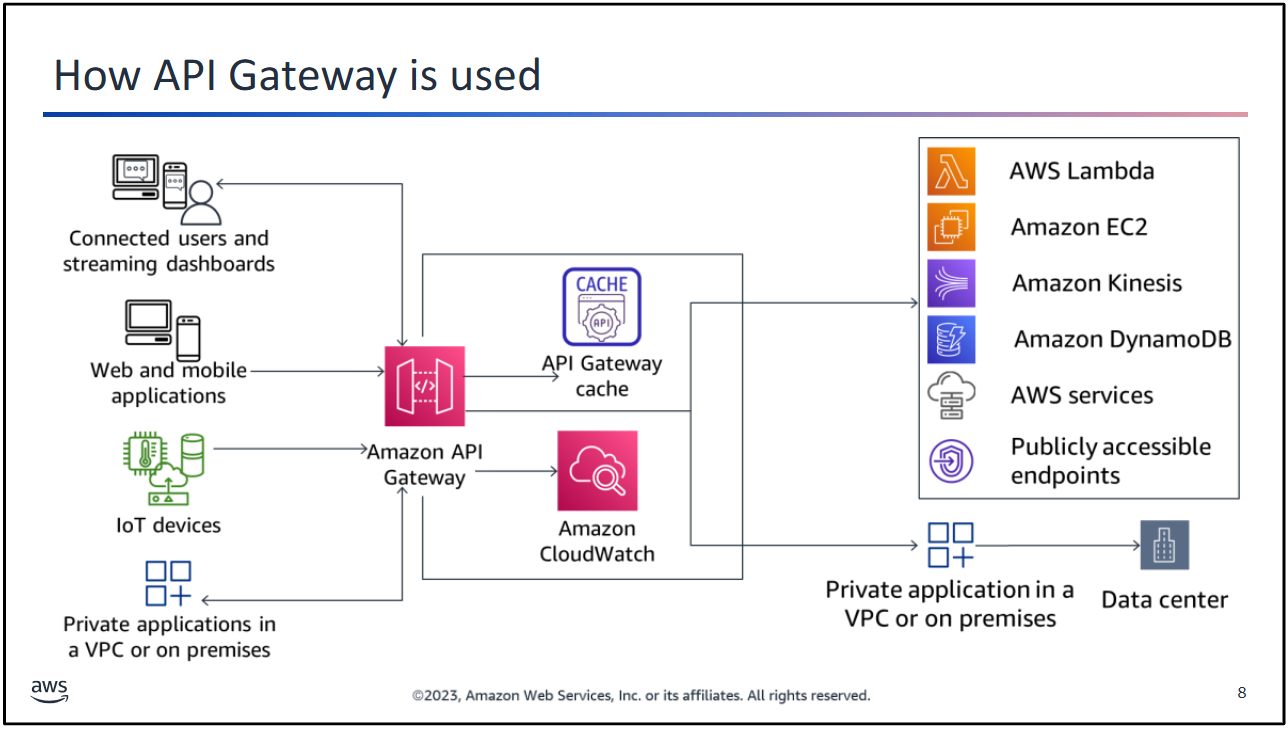

# AWS Step Functions

- Provides serverless *orchestration* for modern applications.

- **Orchestration** centrally manages a workflow by breaking into multiple steps, adding flow logic and tracking inputs and outputs between steps.

    - Step Functions maintains the application state, tracking which workflow step your application is in, and stores an event log of data passed between application components.
    
    - It thus, continues where you left off when the workflow is interrupted.

- Gives you the ability to reuse components and use different services in yoru application. Can also:
    - Coordinating existing Lambda functions and microservices

    - Keeps application logic separated from implementation

## Core Concepts

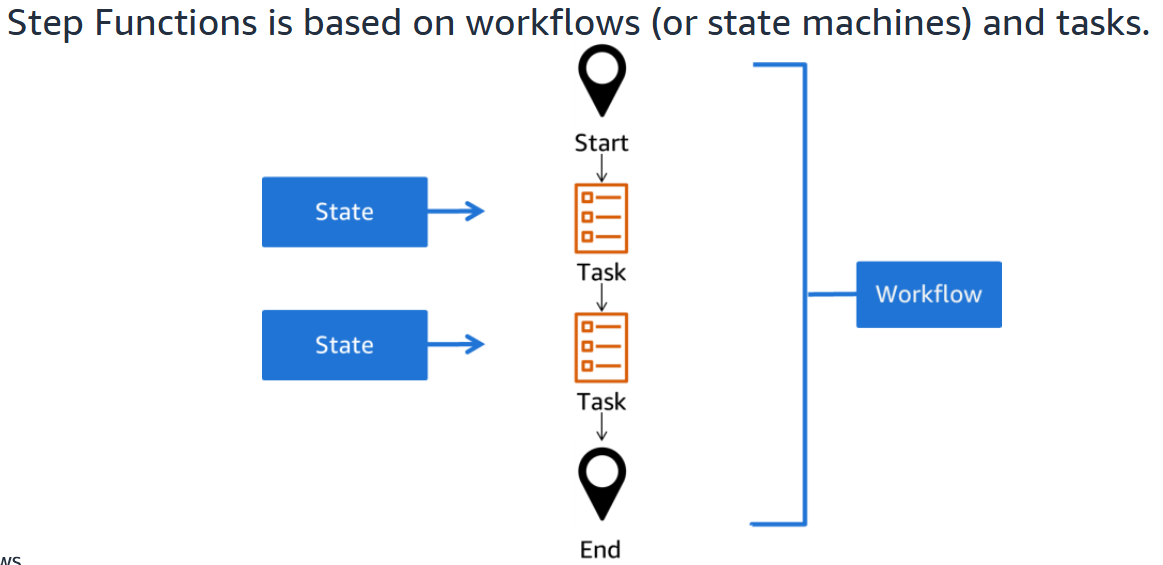

- Workflows that you build with Step Functions are called **State Machines**.

- Each step of your workflow is called a **State**.

- Tasks perform work, either by coordinating another AWS service or an application that you can host basically anywhere.

## Benefits of Step Functions

### Productivity

- You can define and manage the workflow independently from business logic

- Write applications faster because Step Functions provides ready-made steps (states) and built-in error handling

### Agility

- Records a history each time it runs so that you can review all events in the sequence in one location.

- You can scale from one runtime to thousands of concurrent runtimes, especially when you use Step Functions with other serverless AWS resources. 

- Pay for only what you use

### Resilience

- Supports automatic error handling for graceful exits

- Operates at scale, no need to configure/manage underlying resources.

### Features

- High availability

- Automatic Scaling

- Pay per use

- Security and Compliance

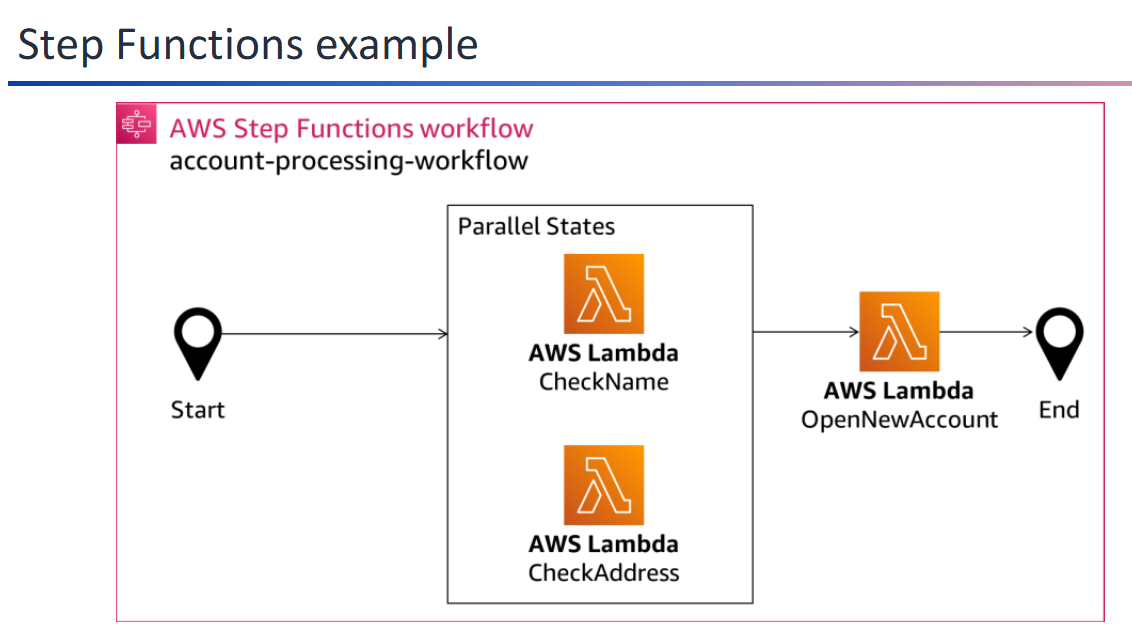

# Containers

- Application that has dependencies, which can run in resource-isolated process.

- The difference with VM is that they share the OS and where appropriate, the bins/libraries.
- they also do not need the hypervisor. They can run on any Linux system with kernel-feature support and Docker daemon.

### Benefits

- **Environemntal consistency** - The application code, config, dependencies are packeaged into one object.

- **Process isolation** - No shared dependencies/incompatibilities.
    - Fixes the "works on my machine"

- **Operational Efficiency** - Pillar of the AWS-WAF (SCORPS).

- **Developer Productivity** - Remove cross-service dependencies and conflicts.
    - Each application component can be broken into different containers that run a different microservice.

    - Containers are isolated from each other, so you do not have to worry about synchronizing libraries or dependencies for each service.
    - Developers can independently upgrade each service because the libraries have no conflicts.

- **Version control** - You can track versions of your application code and their dependencies. Docker containers have a manifest file (**Dockerfile**) that:
    - Maintains and tracks versions of a container

    - Inspect diffference between versions
    - Roll abck previous versions.

## Docker

- Application platform to create, manage, and run containers.

- Developers and engineers can run/build/test/deploy containers.

- Used when:
    - Standardize environments.

    - Reduce conflicts between language stacks and versions.
    - Run microservicesusing standardized code deployments.
    - Require portability for data processing.

### Benefits of Docker

- **Microservices architecture** - One service per container

- **Stateless** - Consist of read-only layers. It does not change when the image is created.
- **Portable** - Your application is independent from the confdigurations of low-level resources (networking, storage, OS).
- **Single, immutable artifact** - Docker also assists with packaging your applications and dependencies in a single, imutable artifact.
- **Reliable deoployments** -  Developers can set up a local development environment that matches a production server. When a developer finishes writing and testing code, they can wrap it in a container and publish it directly to the cloud, and it will instantly work because the environment is the same.


### Docker Components

- **Docker file** - Blueprint used to build the image.

- **Image** - A file for Docker containers at runtime.
- **Registry** -  The version control system for Docker images.
- **Container** - Runnable instance of an image.
- **Host** - A machine that hosts containers.

## AWS Container Services

### Elastic Container Registry (Amazon ECR)
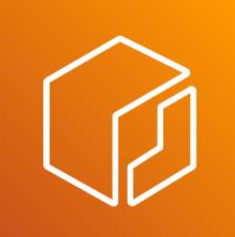

- Fully managed Docker contain registry that developers can use to store, manage, and deploy Docker container images.

- Supports HTTP API Version 2, which allows access thru Docker CLI commands.
- Stores container images in S3 to benefit from high availability and durability.
- You can define and organize repositories using **namespaces**. Thus, you can organize your repo based on your team's existing workflows.
    - You can also set the API actions that another user can perform on your repository.
- Uses IAM for access control. You can control who and what can access your container images through policies.
- You can transfer your container images to and from Amazon ECS via HTTPS.
    - Automatically encrypted by using S3 server-side encryption.
- Supports third party integrations

### Elastic Container Service (Amazon ECS)

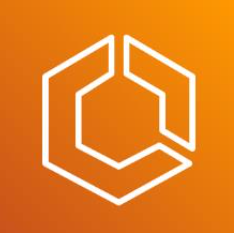

- Highly scalable, high-performance container management service that supports Docker containers.

- Run applications on a managed cluster of EC2 instances. Provides flexible scheduling thru built-in or third party scheduler.

- Launches containers in your own VPC to apply the security groups and NACLs.
    - No compoute shared with other customers

    - Assign granular access permissions for each containers. Use IAM to restrict access to each service and configure which resources a container can access.

-  Amazon ECS tasks are defined through a declarative JSON template that is called a **task definition**. Sprecify the following:
    - Docker repo and image
    - Memory and CPU requirements
    - Shared data volumes
    - Relationships between containers

### Elastic Kubernetes Cluster (Amazon EKS)

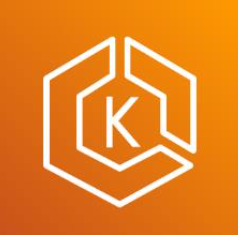

- Run **Kubernetes** on AWS without needing to install and operate your own Kubernetes clusters

- **Kubernetes** is an open-source system for automating the deployment, scaling, and management of containerized applications. 
    - You need to have a cluster to run your applications.

- EKS rnuns three Kubernetes managers across three AZs to provide high availability. EKS detects and replaces unhealthy managers and provides auomated version upgrades and patching.

- Integrated with the following AWS services:
    - *ELB* for load distribution

    - *IAM* for auth
    - *Amazon VPC* for isolation
    - *AWS privateLink* for private network access
    - *AWS CloudTrail* for logging

- You can use Amazon EKS to install, manage, and update common operational software for your cluster directly through the Amazon EKS console, AWS Command Line Interface (AWS CLI), and API.

### AWS Fargate

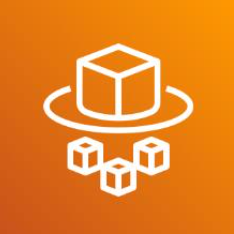

- Compute engine for ECS that you can use to run containers without needing to manage servers or clusters.

- Runs containers without having to manage servers or clusters.

- No longer provision and scale server clusters, or patch and update each server
- Supports ECS and EKS.
- Pay only for resources you use, on a per-second usage basis.
- Forward container logs from pods running on Fargate to AWS services for log storage ana analytics

## Deploying to AWS

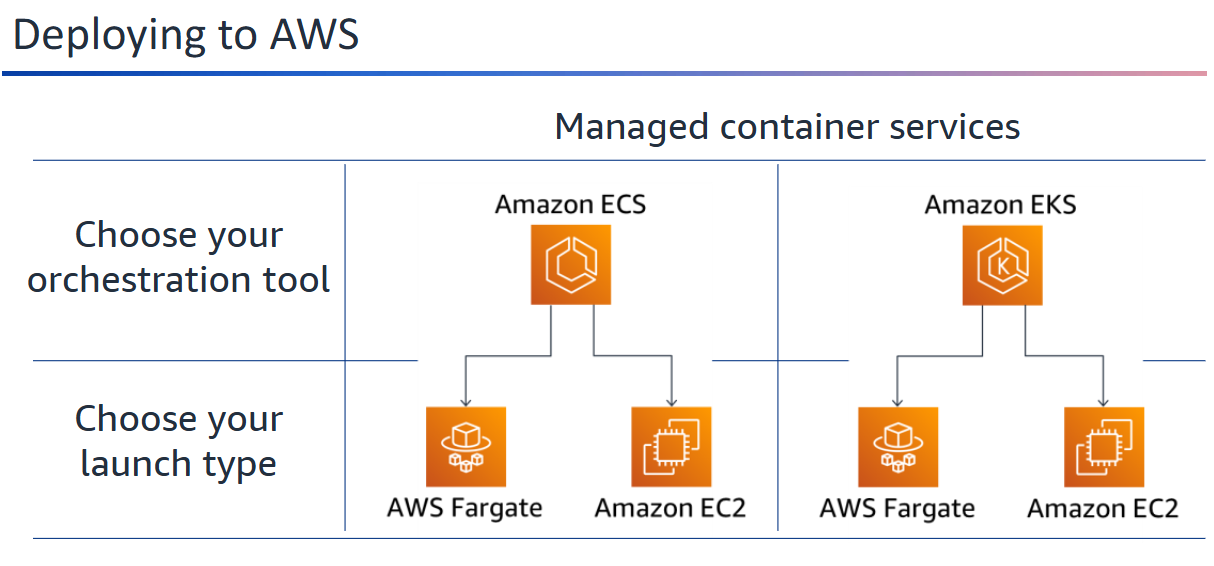